<a href="https://colab.research.google.com/github/Sujal-Patnaik/Task1/blob/main/MLT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Dataset.csv')
modal_gender = df['sex'].mode()[0]
modal_add = df['address'].mode()[0]
modal_famsize = df['famsize'].mode()[0]
modal_Pstatus = df['Pstatus'].mode()[0]
#Here to replace the null values we are considering the mode of the data since only 2 possible values are there for the given property in the column
df.fillna({
    'sex': modal_gender,
    'address': modal_add,
    'famsize': modal_famsize,
    'Pstatus': modal_Pstatus
}, inplace=True)


In [ ]:
df.to_csv('Dataset.csv', index=False)

In [ ]:
Medu_null = df['Medu'].isnull().sum()
Fedu_null = df['Fedu'].isnull().sum()
print(Medu_null)
print(Fedu_null)

0
73


Here i dont need to check for null values of Medu, but i will calculate the mean,median and mode for Fedu.

In [ ]:
mean = df['Fedu'].mean()
median = df['Fedu'].median()
mode = df['Fedu'].mode()[0]
print(mean)
print(median)
print(mode)

2.3038194444444446
2.0
2.0


since both the median and mode are 2.0 and the mean is near to 2.0 therefore i will replace the null values with 2

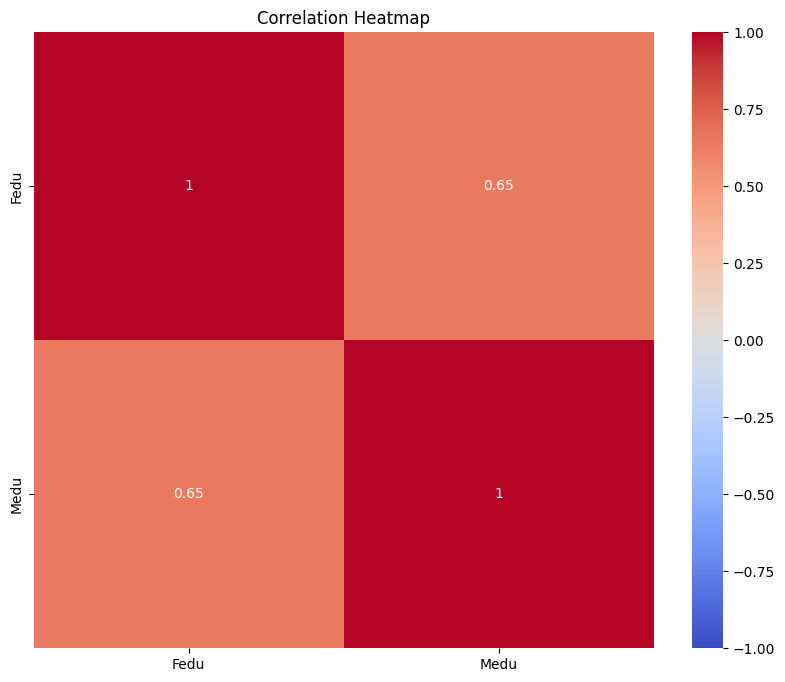

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.DataFrame()
df1 = df[['Fedu','Medu']]
correlation_matrix = df1.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


There is a very high correlation between Fedu and Medu so simply filling the null values with mean,median or mode of the Fedu column is not a good approach.

In [ ]:
mean = df['Medu'].mean()
median = df['Medu'].median()
mode = df['Medu'].mode()[0]
print(mean)
print(median)
print(mode)

2.514637904468413
2.0
2


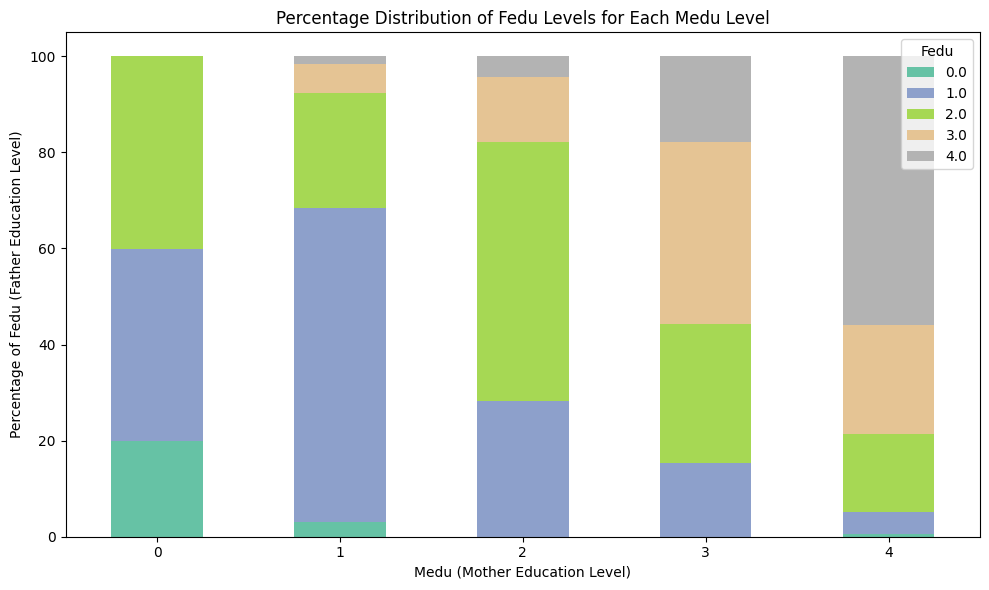

In [ ]:

count_table = pd.crosstab(df['Medu'], df['Fedu'])

percent_table = count_table.div(count_table.sum(axis=1), axis=0) * 100

percent_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Percentage Distribution of Fedu Levels for Each Medu Level')
plt.xlabel('Medu (Mother Education Level)')
plt.ylabel('Percentage of Fedu (Father Education Level)')
plt.legend(title='Fedu')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Now as per the above distribution I have decided to fill the null values of Fedu in the following manner:
If Medu = 0, 1, 2, 3, 4 I want to fill the null values of Fedu as 2, 1, 2, 3, 4 respectively.

In [ ]:
fedu_fill_map = {
    0: 2,
    1: 1,
    2: 2,
    3: 3,
    4: 4
}
def conditional_fill(row):
    if pd.isnull(row['Fedu']):
        return fedu_fill_map.get(row['Medu'], row['Fedu'])
    return row['Fedu']
df['Fedu'] = df.apply(conditional_fill, axis=1)
df.to_csv('Dataset.csv', index=False)


In [ ]:
'''df.fillna({
    'Fedu': 2
}, inplace=True)
df.to_csv('Dataset.csv',index = False)
'''
# ---  THIS IS WHAT I HAD DONE PREVIOUSLY BUT DROPPED THIS IDEA DUE TO HEAVY CORRELATION BETWEEN MEDU AND FEDU ----#

"df.fillna({\n    'Fedu': 2\n}, inplace=True)\ndf.to_csv('Dataset.csv',index = False)\n"

In [ ]:
Mjob_null = df['Mjob'].isnull().sum()
Fjob_null = df['Fjob'].isnull().sum()
print(Mjob_null)
print(Fjob_null)

0
0


No null values for Mjob and Fjob

In [ ]:
reason_null = df['reason'].isnull().sum()
guardian_null = df['guardian'].isnull().sum()
print(reason_null)
print(guardian_null)


0
0


No null values for reason and guardian.

In [ ]:
traveltime_null = df['traveltime'].isnull().sum()
print(traveltime_null)

73


There are 73 null values for traveltime. We can replace these null values through by finding out the mean,median and mode.

In [ ]:
mean = df['traveltime'].mean()
median = df['traveltime'].median()
mode = df['traveltime'].mode()[0]
print(mean)
print(median)
print(mode)

1.5746527777777777
1.0
1.0


In [ ]:
mean_Urban = df[df['address'] == 'U']['traveltime'].mean()
mean_Rural = df[df['address'] == 'R']['traveltime'].mean()
mode_Urban = df[df['address'] == 'U']['traveltime'].mode()[0]
mode_Rural = df[df['address'] == 'R']['traveltime'].mode()[0]
median_Urban = df[df['address'] == 'U']['traveltime'].median()
median_Rural = df[df['address'] == 'R']['traveltime'].median()
print(mean_Urban)
print(mean_Rural)
print(mode_Urban)
print(mode_Rural)
print(median_Urban)
print(median_Rural)

1.4
1.9715909090909092
1.0
2.0
1.0
2.0


Now since it is observed that the traveltime is actually influenced by rural and urban areas, the null values of travel time is set to 2 for rural areas and 1 for urban areas.

In [ ]:
df.loc[(df['traveltime'].isna()) & (df['address'] == 'U'), 'traveltime'] = 1
df.loc[(df['traveltime'].isna()) & (df['address'] == 'R'), 'traveltime'] = 2
df.to_csv('Dataset.csv')

In [ ]:
failures_null = df['failures'].isnull().sum()
print(failures_null)

0


there are no null values for failures

In [ ]:
schoolsup_null = df['schoolsup'].isnull().sum()
famsup_null = df['famsup'].isnull().sum()
paid_null = df['paid'].isnull().sum()
activities_null = df['activities'].isnull().sum()
nursery_null = df['nursery'].isnull().sum()
higher_null = df['higher'].isnull().sum()
internet_null = df['internet'].isnull().sum()
romantic_null = df['romantic'].isnull().sum()
print(schoolsup_null)
print(famsup_null)
print(paid_null)
print(activities_null)
print(nursery_null)
print(higher_null)
print(internet_null)
print(romantic_null)

0
0
0
0
0
76
0
0


there are 76 null values for interest in higher education.

For filling the null values of higher education we have to analyse other properties like the address(U/R), schoolsup, famsup, extra paid classes and internet access at home.

I plotting a correlation Matrix between 'higher and other properties like address, schoolsup,famsup,extrapaid classes and internet. I will convert the yes to 1 and no 0 and also U to 1 and R to 0.

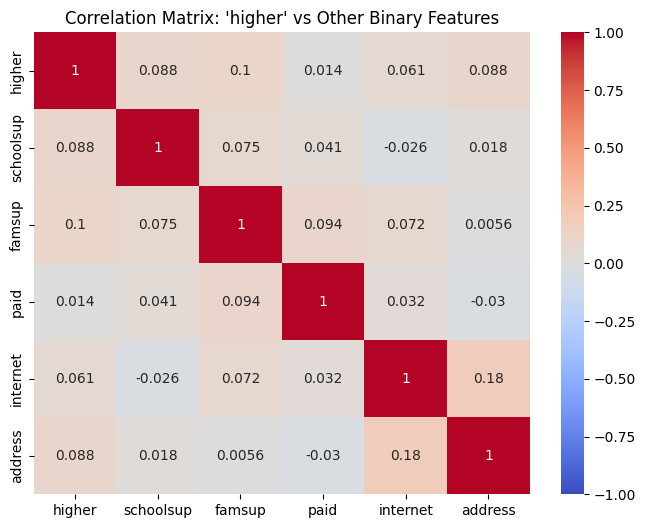

In [ ]:

cols = ['higher', 'schoolsup', 'famsup', 'paid', 'internet', 'address']
df_binary = df[cols].copy()
for col in ['higher', 'schoolsup', 'famsup', 'paid', 'internet']:
    df_binary[col] = df_binary[col].map({'yes': 1, 'no': 0})

df_binary['address'] = df_binary['address'].map({'U': 1, 'R': 0})


corr_matrix = df_binary.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix: 'higher' vs Other Binary Features")
plt.show()


We can see none of the properties have a considerably high correlation with higher so i will fill the null values of higher just by the mode of this column

In [ ]:
print(df['higher'].value_counts())

higher
yes    509
no      64
Name: count, dtype: int64


In [ ]:
df['higher'] = df['higher'].fillna(df['higher'].mode()[0])
df.to_csv('Dataset.csv')

In [ ]:
'''def addpoints(r):
  x = 0
  if r['address'] == 'U':
    x += 1
  if r['schoolsup'] == 'yes':
    x += 1
  if r['famsup'] == 'yes':
    x += 1
  if r['paid'] == 'yes':
    x += 1
  if r['internet'] == 'yes':
    x += 1
  return x
df['higher_points'] = df.apply(addpoints, axis=1)
List = df['higher_points'].to_list()
S = set(List)
print(S)
'''
# -- THIS IS WHAT I HAD DONE PREVIOUSLY BUT LEFT THIS STRATEGY -- #

"def addpoints(r):\n  x = 0\n  if r['address'] == 'U':\n    x += 1\n  if r['schoolsup'] == 'yes':\n    x += 1\n  if r['famsup'] == 'yes':\n    x += 1\n  if r['paid'] == 'yes':\n    x += 1\n  if r['internet'] == 'yes':\n    x += 1\n  return x\ndf['higher_points'] = df.apply(addpoints, axis=1)\nList = df['higher_points'].to_list()\nS = set(List)\nprint(S)\n"

In [ ]:
'''y_count = [0]*6
n_count = [0]*6
for i in range(6):
  y_count[i] += df.loc[(df['higher_points'] == i) & (df['higher'] == 'yes')].shape[0]
  n_count[i] += df.loc[(df['higher_points'] == i) & (df['higher'] == 'no')].shape[0]
def fill_nulls(r):
  if pd.isna(r['higher']):
    if y_count[r['higher_points']] > n_count[r['higher_points']]:
      return 'yes'
    else:
      return 'no'
  else:
    return r['higher']
df['higher'] = df.apply(fill_nulls, axis=1)
df.drop(columns='higher_points',inplace=True)
df.to_csv('Dataset.csv')
'''
##Here we have filled the null values of higher column as yes if with more number of students prefer for higher studies with same kind of address,famsup,schoolsup,internet,extra paid class facilities and vice versa


"y_count = [0]*6\nn_count = [0]*6\nfor i in range(6):\n  y_count[i] += df.loc[(df['higher_points'] == i) & (df['higher'] == 'yes')].shape[0]\n  n_count[i] += df.loc[(df['higher_points'] == i) & (df['higher'] == 'no')].shape[0]\ndef fill_nulls(r):\n  if pd.isna(r['higher']):\n    if y_count[r['higher_points']] > n_count[r['higher_points']]:\n      return 'yes'\n    else:\n      return 'no'\n  else:\n    return r['higher']\ndf['higher'] = df.apply(fill_nulls, axis=1)\ndf.drop(columns='higher_points',inplace=True)\ndf.to_csv('Dataset.csv')\n"

In the above 2 codeblocks I have implemented earlier a strategy. But that strategy is wrong since other columns are not related to higher.

In [ ]:
famrel_null = df['famrel'].isnull().sum()
freetime_null = df['freetime'].isnull().sum()
goout_null = df['goout'].isnull().sum()
print(famrel_null)
print(freetime_null)
print(goout_null)

0
45
0


we have 45 null values from the freetime column which we can fill by using the mean,median and mode values of this column

In [ ]:
mean = df['freetime'].mean()
median = df['freetime'].median()
mode = df['freetime'].mode()[0]
print(mean)
print(median)
print(mode)

3.172185430463576
3.0
3.0


since we can see that it is a normalized distribution with the mean,median and mode being almost equal to 3 we can replace the null values.

In [ ]:
df.fillna({
    'freetime': 3
}, inplace=True
)
df.to_csv('Dataset.csv')

In [ ]:
Dalc_null = df['Dalc'].isnull().sum()
health_null = df['health'].isnull().sum()
absences_null = df['absences'].isnull().sum()
print(absences_null)
print(Dalc_null)
print(health_null)

69
0
0


We have 69 null values in absences column which we can fill by mean,median and mode of the data of the column.

In [ ]:
mean = df['absences'].mean()
median = df['absences'].median()
mode = df['absences'].mode()[0]
print(mean)
print(median)
print(mode)

3.746551724137931
2.0
0.0


This is not a very normalized distribution but rather a skewed ditribution.

In [ ]:
print(df['absences'].value_counts().get(0,0))

216


The mode is 216 times repeated, from 579 actual values present that is 37.3% of valid data is represented by the mode which is not even near to half of the total data. choosing the mean to fill the null values will also be a unrealistic distribution since this will distort the distribution towards higher values. Rather replacing the null values with median will help in getting a more realistic distribution as it will ensure the data is balanced around the centre.

In [ ]:
df.fillna({
    'absences': median
}, inplace=True
)
df.to_csv('Dataset.csv')


In [ ]:
G1_null = df['G1'].isnull().sum()
G2_null = df['G2'].isnull().sum()
G3_null = df['G3'].isnull().sum()
print(G1_null)
print(G2_null)
print(G3_null)

0
35
0


35 null values in G2, which we will replace using mean,median and mode again.

In [ ]:
mean = df['G2'].mean()
median = df['G2'].median()
mode = df['G2'].mode()[0]
print(mean)
print(median)
print(mode)

11.586319218241043
11.0
11.0


since all the mean, median and mode are nearly 11 so we can replace the null values with 11 but we also need to check the correlation between G2 and G1 and G3.

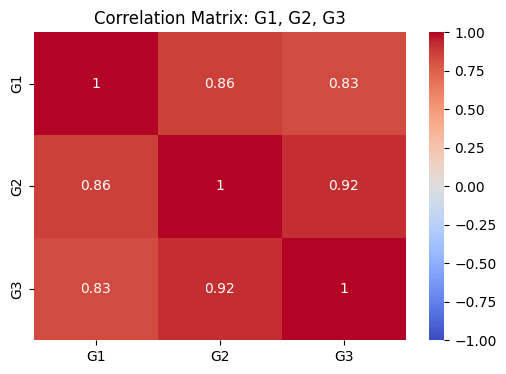

In [ ]:

grades = df[['G1', 'G2', 'G3']]
corr_matrix = grades.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: G1, G2, G3')
plt.show()


Since there is a high correlation between G2 and G1 and G3. I am going to fill the average of G1 and G3 in null values of G2.

In [ ]:
df['G2'] = df['G2'].fillna(((df['G1'] + df['G3']) / 2).round().astype(int))
df.to_csv('Dataset.csv')

In [ ]:
df.fillna({
    'G2' : 11.0
},inplace = True)
df.to_csv('Dataset.csv')
## THIS IS WHAT I HAD EARLIER DONE, BUT THIS APPROACH IS WRONG ##
## PLEASE DO NOT RUN THIS BLOCK ##

Now we need to identify what do Feature1,Feature2 and Feature3 represents.

In [ ]:
df[['Feature_1']].describe()

,Feature_1
count,611.000000
mean,16.747954
std,1.216812
min,15.000000
25%,16.000000
50%,17.000000
75%,18.000000
max,22.000000


Feature_1 probably represents the age of the students. Since 75% of students are less than or equal to 18 years and median is 17 years and also the average is 16.7 that is nearly 17years which is the age of high school going students. We will try to further prove our assumption by making boxplots with Absences, Freetime, Health and traveltime.

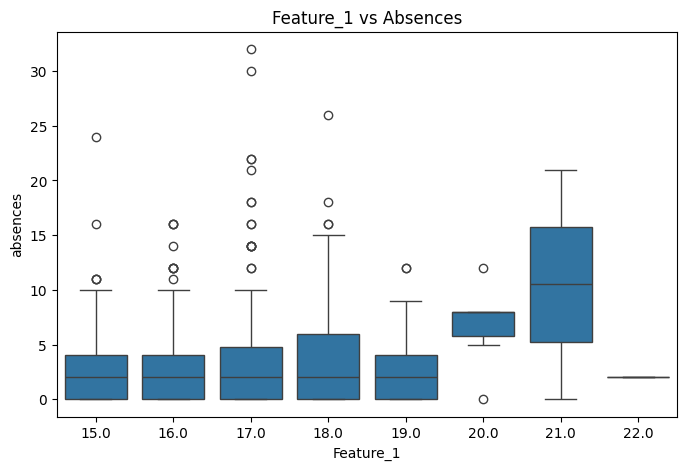

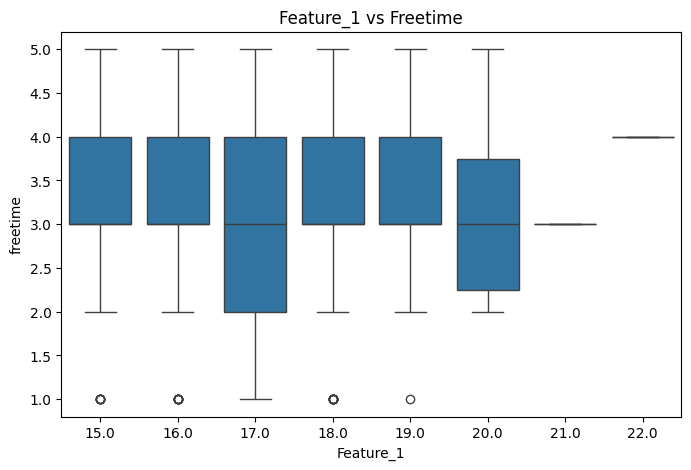

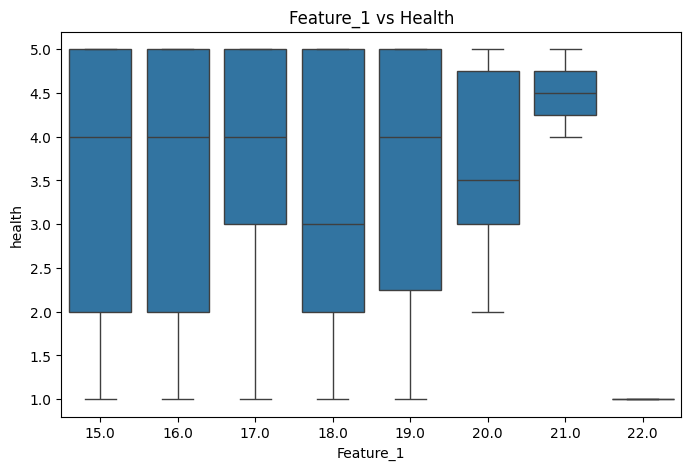

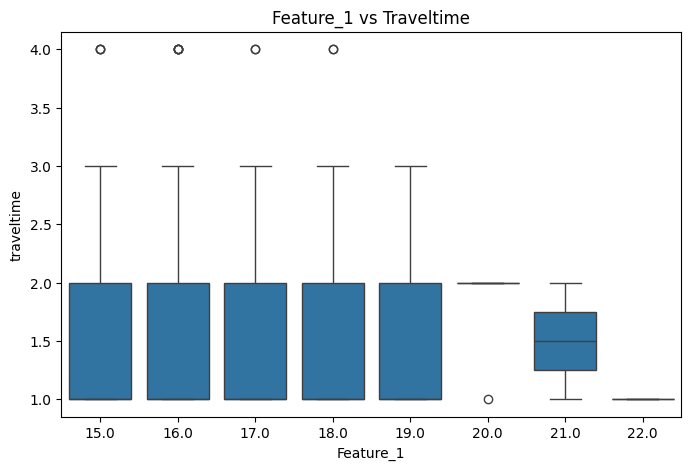

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Feature_1', y='absences', data=df)
plt.title('Feature_1 vs Absences')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Feature_1', y='freetime', data=df)
plt.title('Feature_1 vs Freetime')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Feature_1', y='health', data=df)
plt.title('Feature_1 vs Health')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Feature_1', y='traveltime', data=df)
plt.title('Feature_1 vs Traveltime')
plt.show()


We cannot draw much conclusions from the traveltime, Health and Freetime graphs since the distribution is almost uniform till 19 and there are very less students of age 20,21,22 so nothing much can be concluded from a low number of datapoints.


For the absences graph we can see that majority of the students have relatively low absences till 19 years of age, whereas for higher ages like 20 and 21 years they have higher absences, probably due to more responsibilities for making income for their family. So this supports that the Feature_1 column is age of the students.

We can finally conclude that the Feature_1 column is age of the students

In [ ]:
mode = df['Feature_1'].mode()[0]
print(mode)

17.0


since the mean is approximately 17 and the median and mode of the Feature_1 column are 17, it is a very normal distribution and we can replace the null values with 17.

In [ ]:
df.fillna({
    'Feature_1' : 17.0
},inplace = True)
df.to_csv('Dataset.csv')


In [ ]:
df[['Feature_2']].describe()

,Feature_2
count,603.000000
mean,1.913765
std,0.830798
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


In [ ]:
print(df['Feature_2'].value_counts().sort_index())

Feature_2
1.0    204
2.0    279
3.0     88
4.0     32
Name: count, dtype: int64


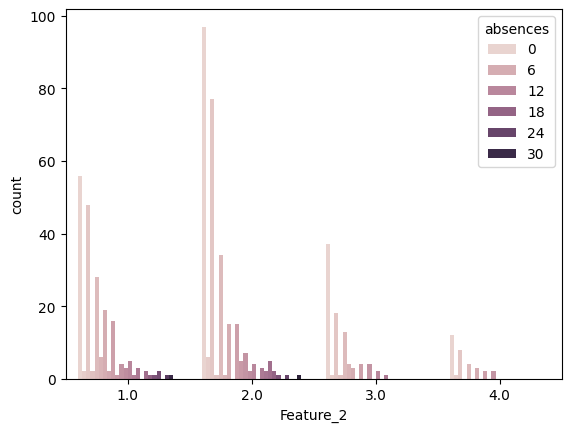

In [ ]:
sns.countplot(x='Feature_2',hue='absences',data=df)
plt.show()

Feature_2 is not related to absences since for Feature_2 being 1,2,3,4 almost the same type of distribution is there for absences.

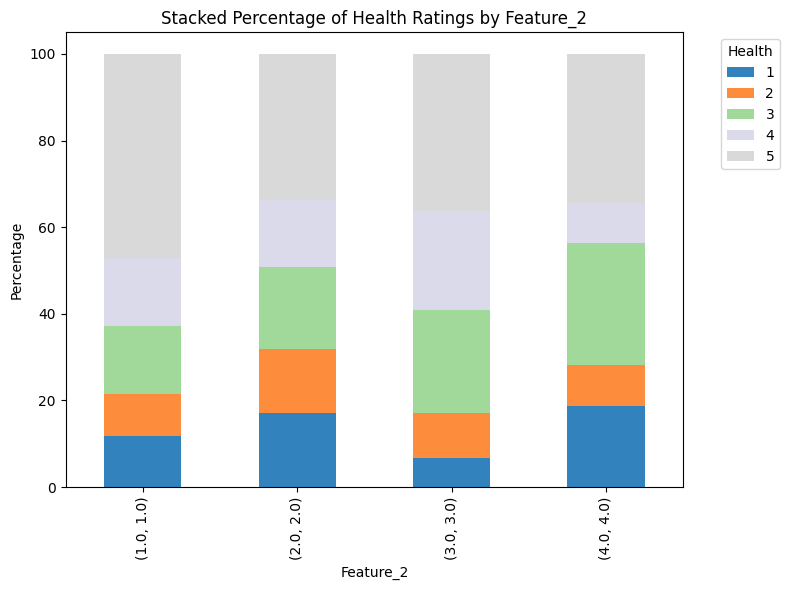

In [ ]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_2', 'health']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of Health Ratings by Feature_2')
plt.ylabel('Percentage')
plt.xlabel('Feature_2')
plt.legend(title='Health', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Even Health maintains almost the same distribution against different values of Feature_2 and hence it is not related to health.

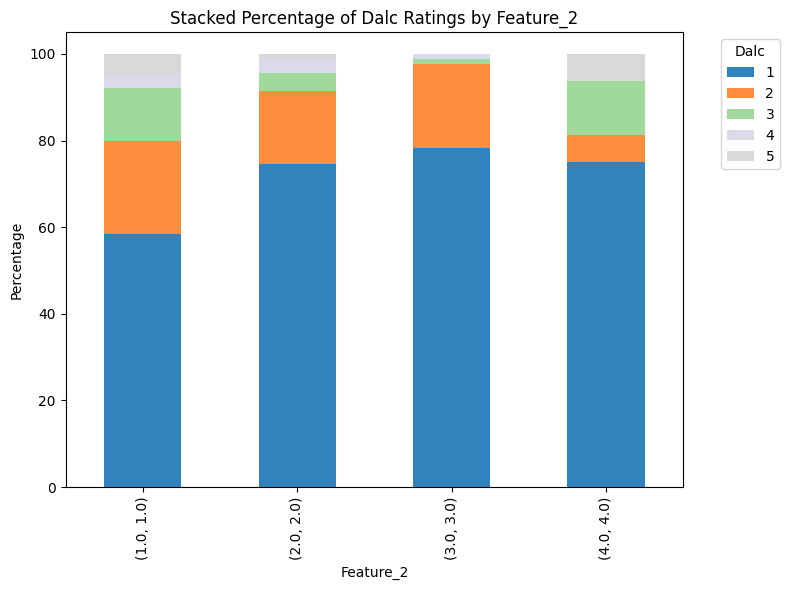

In [ ]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_2', 'Dalc']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of Dalc Ratings by Feature_2')
plt.ylabel('Percentage')
plt.xlabel('Feature_2')
plt.legend(title='Dalc', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


It seems that somehow Daily alcohol consumption is inverselt related to Feature_2 since increase in feature 2 leads to decrease in high alcohol consumption and increase in low alcohol consumption on weekdays.

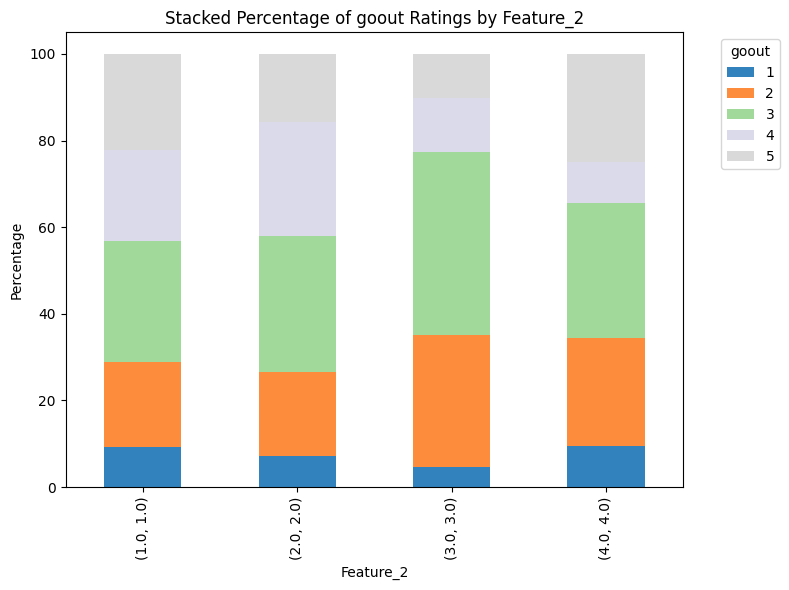

In [ ]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_2', 'goout']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of goout Ratings by Feature_2')
plt.ylabel('Percentage')
plt.xlabel('Feature_2')
plt.legend(title='goout', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


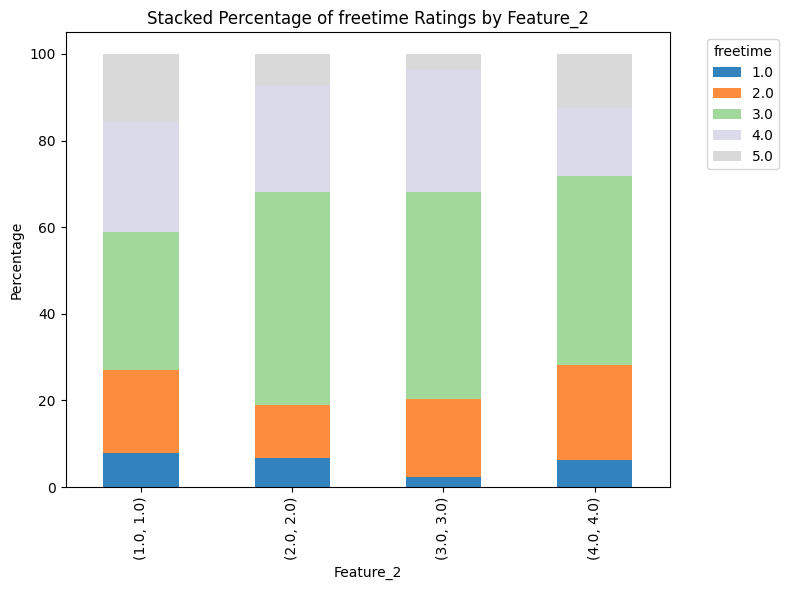

In [ ]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_2', 'freetime']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of freetime Ratings by Feature_2')
plt.ylabel('Percentage')
plt.xlabel('Feature_2')
plt.legend(title='freetime', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

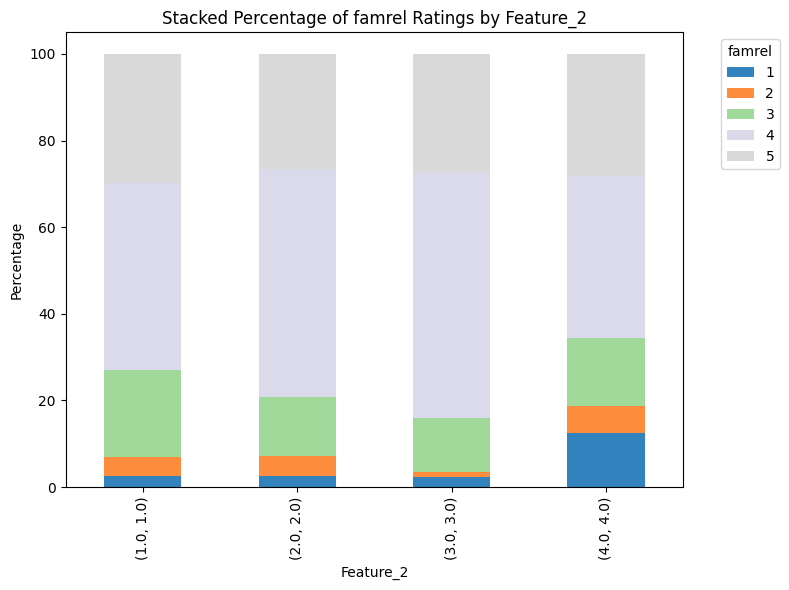

In [ ]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_2', 'famrel']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of famrel Ratings by Feature_2')
plt.ylabel('Percentage')
plt.xlabel('Feature_2')
plt.legend(title='famrel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()# Create the percentage DataFrame


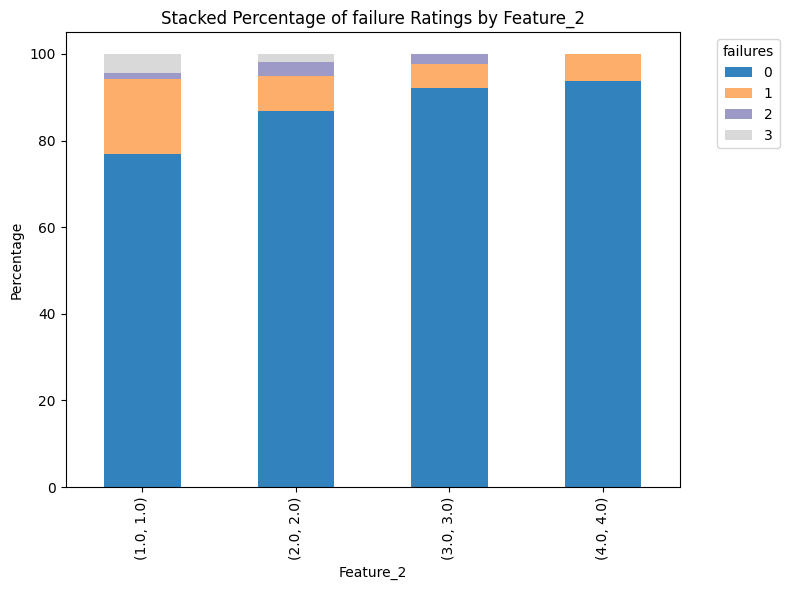

In [ ]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_2', 'failures']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of failure Ratings by Feature_2')
plt.ylabel('Percentage')
plt.xlabel('Feature_2')
plt.legend(title='failures', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This graph suggests that Feature_2 is clearly inversely proportional to failures. As Feature_2 increases we can see that the chances of the student getting failed decreases.

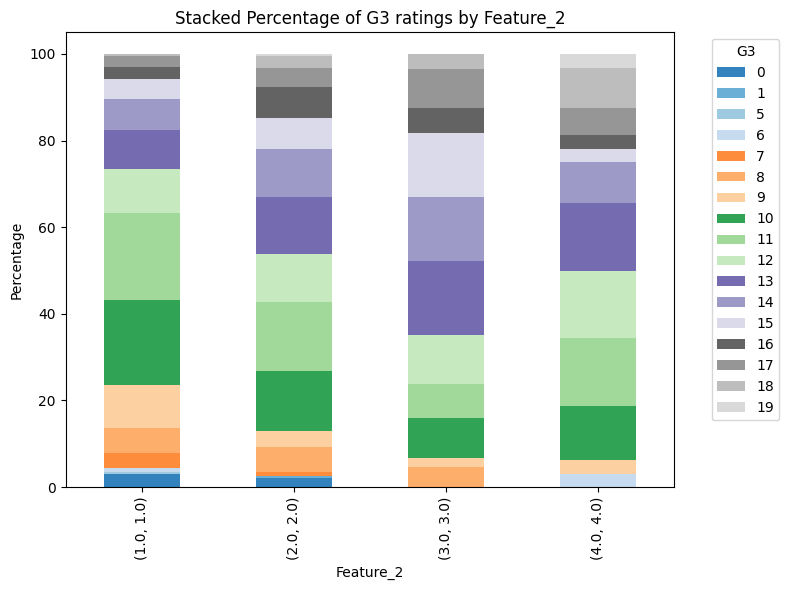

In [ ]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_2', 'G3']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of G3 ratings by Feature_2')
plt.ylabel('Percentage')
plt.xlabel('Feature_2')
plt.legend(title='G3', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

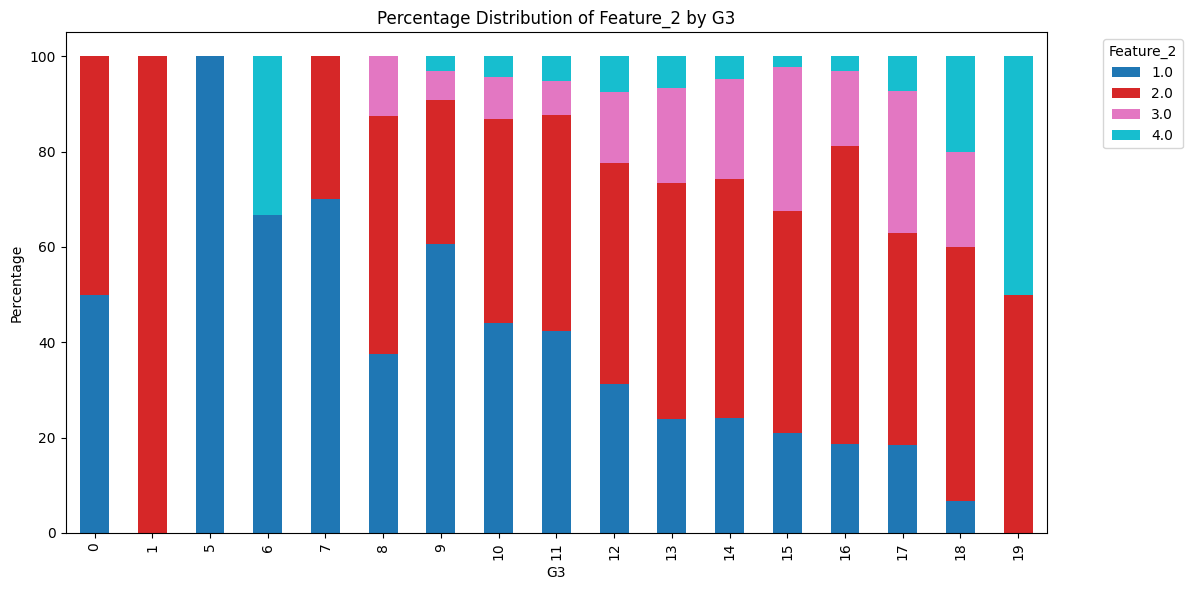

In [ ]:
# Replace with your actual column names
group_col = 'G3'     # Column with values from 0 to 20
hue_col = 'Feature_2'          # Column with values 1, 2, 3, 4

# Step 1: Create a cross-tab of counts
count_data = pd.crosstab(df[group_col], df[hue_col])

# Step 2: Convert counts to percentages
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked percentage bar chart
percent_data.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab10')

# Step 4: Formatting
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {hue_col} by {group_col}')
plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This shows that increase in grading increases the percetage of students with Feature_2 = 4 and decreases the percentage of students with Feature_2 = 1. We will further confirm this by plotting the same bar graph taking G1 and G2.

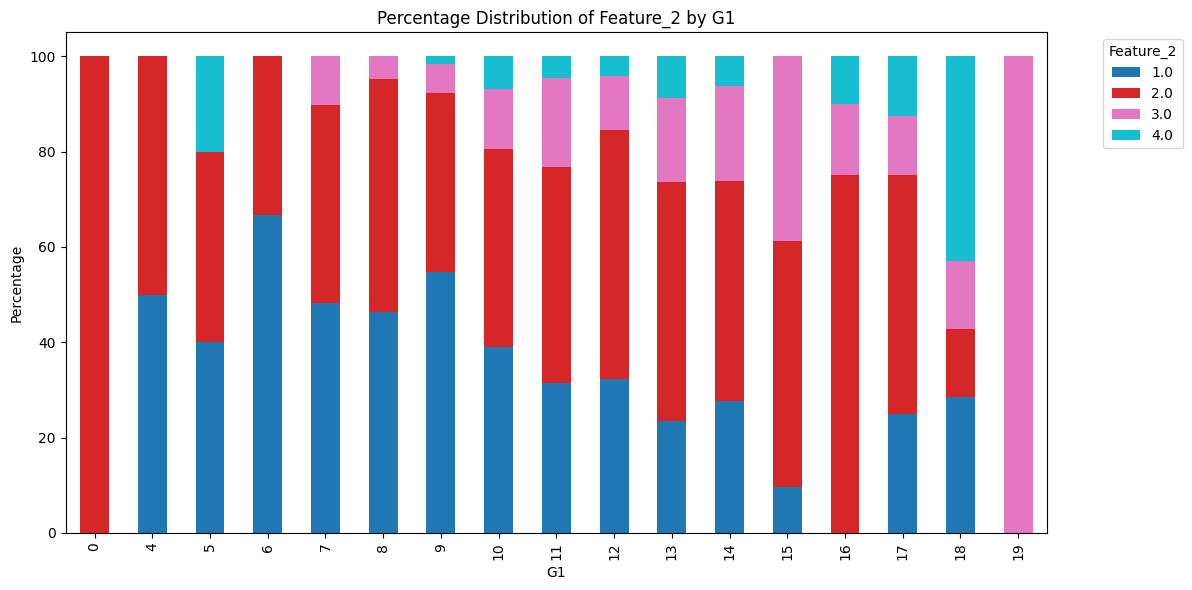

In [ ]:
# Replace with your actual column names
group_col = 'G1'     # Column with values from 0 to 20
hue_col = 'Feature_2'          # Column with values 1, 2, 3, 4

# Step 1: Create a cross-tab of counts
count_data = pd.crosstab(df[group_col], df[hue_col])

# Step 2: Convert counts to percentages
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked percentage bar chart
percent_data.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab10')

# Step 4: Formatting
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {hue_col} by {group_col}')
plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This again proves that Feature_2 is related to academics since increasing grades shows increase in percentage of students with higher Feature_2.

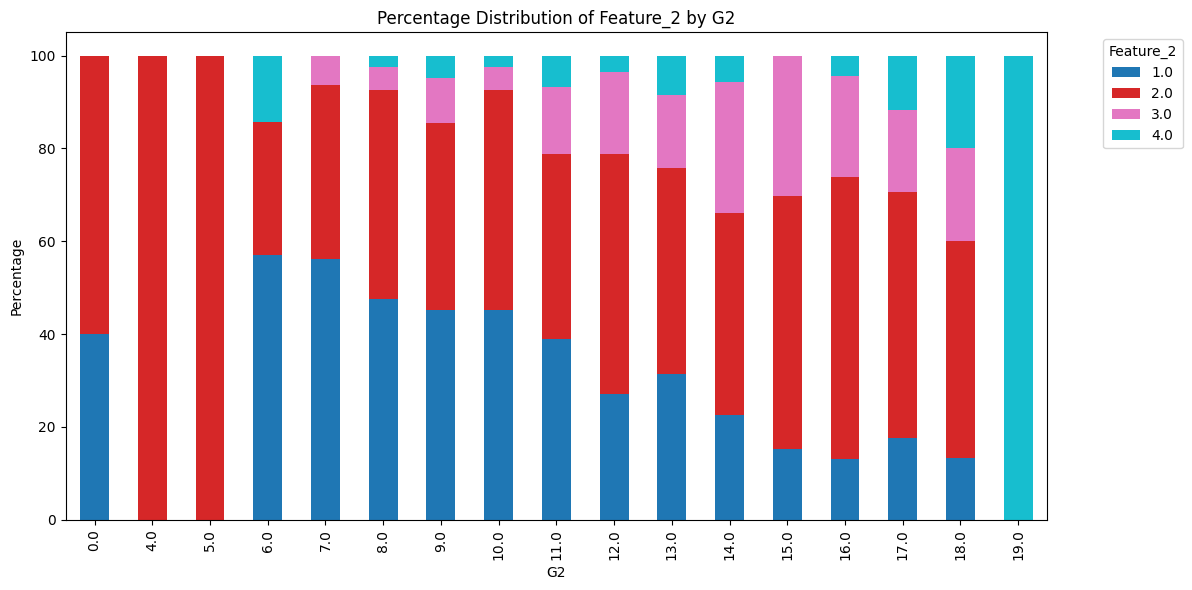

In [ ]:
# Replace with your actual column names
group_col = 'G2'     # Column with values from 0 to 20
hue_col = 'Feature_2'          # Column with values 1, 2, 3, 4

# Step 1: Create a cross-tab of counts
count_data = pd.crosstab(df[group_col], df[hue_col])

# Step 2: Convert counts to percentages
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked percentage bar chart
percent_data.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab10')

# Step 4: Formatting
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {hue_col} by {group_col}')
plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


We can finally conclude that Feature_2 is clearly related to academics, probably IQ or study hours. Now the distribution of students with respect to Feature_2 is skewed and not a normal distribution. The distribution is more towards the 1 and 2 and very less for 3 and 4. So we can rule out that Feature_2 is not IQ rating, since for IQ rating we would have expected more percentage of students in the middle that is 2 and 3 and very less percentage in 1 and 4. But that is not the case.


So Feature_2 probably represents study hours rating since most of the students would be studying less and moderately. Very few students study excessively.

Now we will fill the null values of Feature_2. Since we have found out the mean of the data to be approximately 2 and the median and mode are also 2 therefore we can replace the null values with 2.

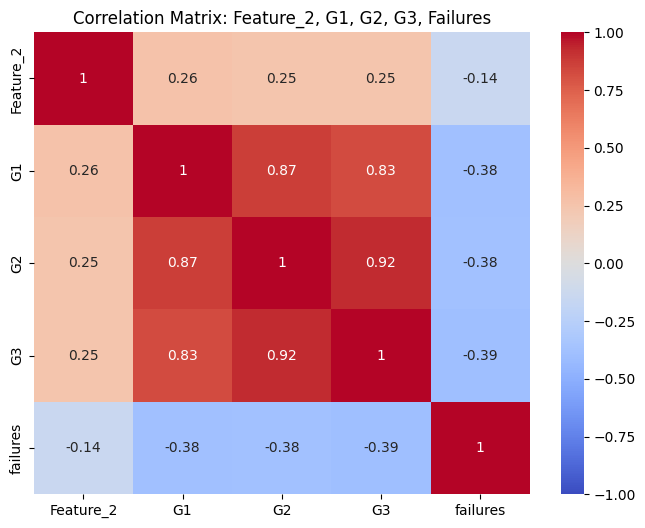

In [ ]:

from sklearn.preprocessing import StandardScaler

cols = ['Feature_2', 'G1', 'G2', 'G3', 'failures']
df_subset = df[cols].copy()

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=cols)

corr_matrix = df_scaled.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Feature_2, G1, G2, G3, Failures')
plt.show()


We dont see a very high correlation between G1,G2,G3,failures and Feature_2 in the matrix. Though graphically we can predict that Feature_2 is probably study hour rating. So we will fill the null values with 2 as decided earlier.

In [ ]:
df.fillna({
    'Feature_2' : 2.0
},inplace = True)
df.to_csv('Dataset.csv')

In [ ]:
df[['Feature_3']].describe()

,Feature_3
count,610.000000
mean,2.262295
std,1.285279
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


In [ ]:
df['Feature_3'].value_counts().sort_index()

,count
Feature_3,
1.0,239
2.0,137
3.0,109
4.0,85
5.0,40


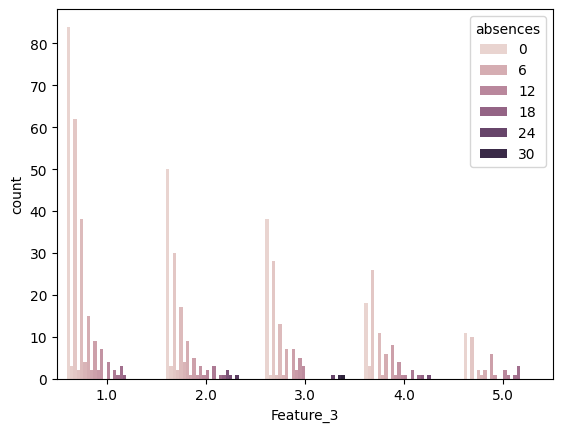

In [ ]:
sns.countplot(x='Feature_3',hue='absences',data=df)
plt.show()

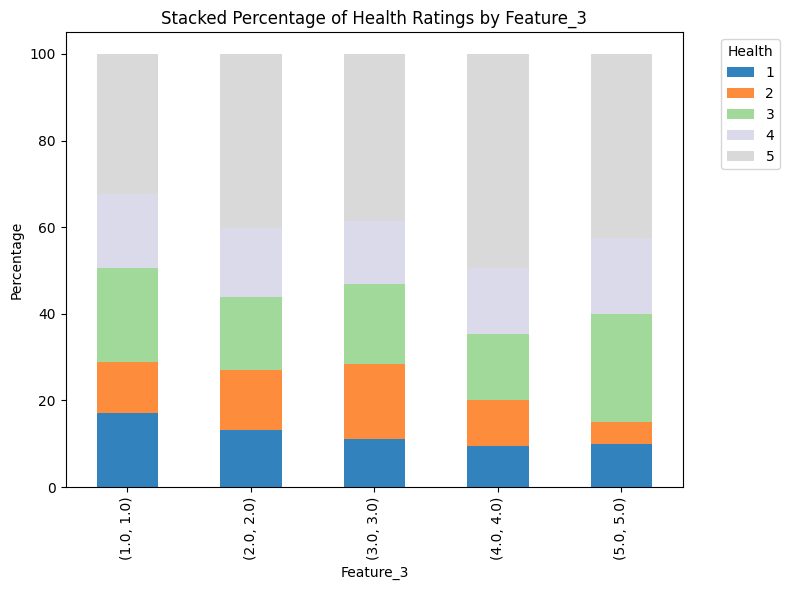

In [ ]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_3', 'health']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of Health Ratings by Feature_3')
plt.ylabel('Percentage')
plt.xlabel('Feature_3')
plt.legend(title='Health', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


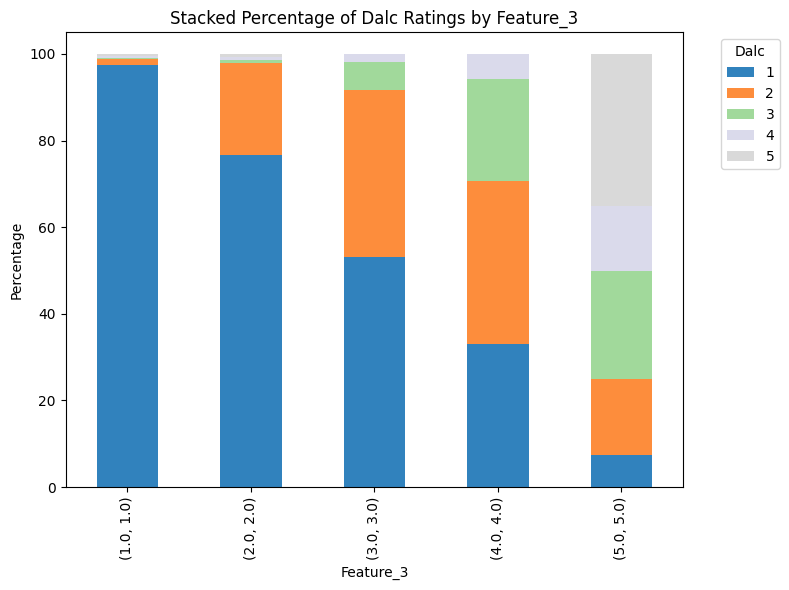

In [ ]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_3', 'Dalc']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of Dalc Ratings by Feature_3')
plt.ylabel('Percentage')
plt.xlabel('Feature_3')
plt.legend(title='Dalc', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


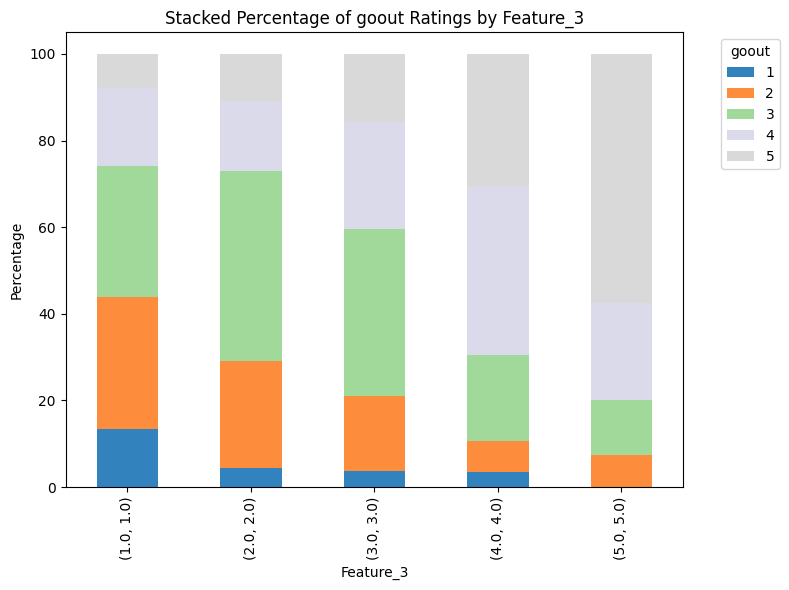

In [ ]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_3', 'goout']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of goout Ratings by Feature_3')
plt.ylabel('Percentage')
plt.xlabel('Feature_3')
plt.legend(title='goout', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Sin

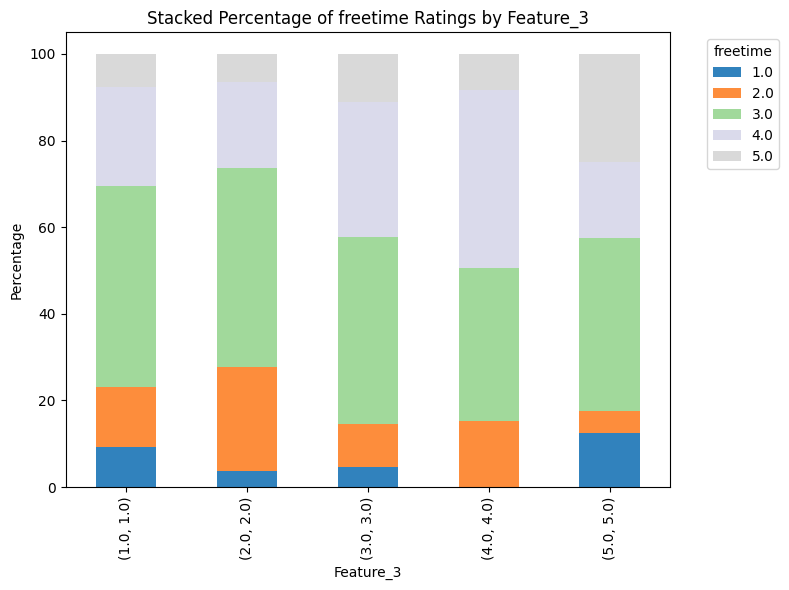

In [ ]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_3', 'freetime']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of freetime Ratings by Feature_3')
plt.ylabel('Percentage')
plt.xlabel('Feature_3')
plt.legend(title='freetime', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

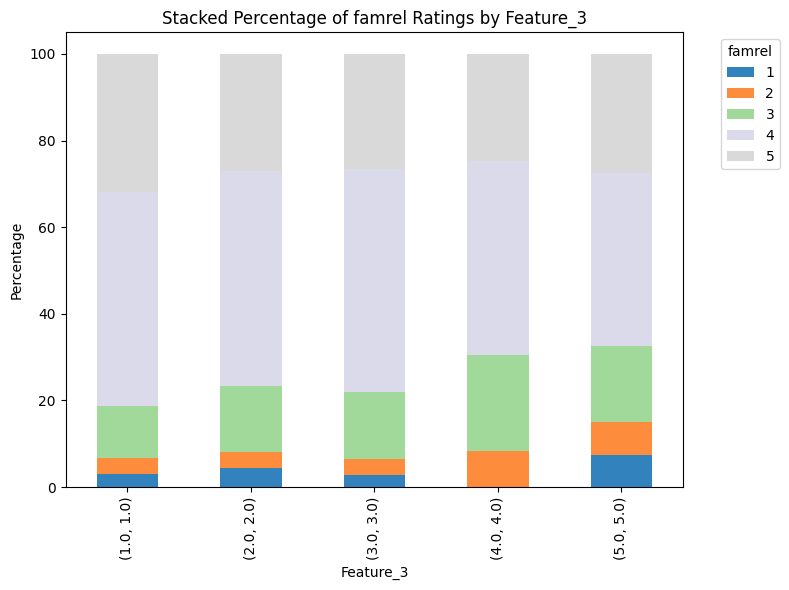

In [ ]:
percent_df = (
    df.groupby(['Feature_3', 'famrel']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of famrel Ratings by Feature_3')
plt.ylabel('Percentage')
plt.xlabel('Feature_3')
plt.legend(title='famrel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
romantic_null = df['romantic'].isnull().sum()
print(romantic_null)

0


In [ ]:
mean = df['Feature_3'].mean()
median = df['Feature_3'].median()
mode = df['Feature_3'].mode()[0]
print(mean," ",median," ",mode)

2.262295081967213   2.0   1.0


since the mean,median and mode of Feature 3 are all near to 2, we can replace the null values of this column with 2.

In [ ]:
df.fillna({
    'Feature_3' : 2.0
},inplace = True)
df.to_csv('Dataset.csv')

                            FIVE INSIGHTFUL QUESTIONS REGARDING THE DATASET AND MEANINGFUL CONCLUSIONS

1. The first question is :
    HOW DOES PARENTS EDUCATION AFFECTS STUDENTS EDUCATION. (Give a Qualitative Analysis.)

In [ ]:

medu_grades = df.groupby('Medu')[['G1', 'G2', 'G3']].mean()
print("Mean grades by mother's education (Medu):")
print(medu_grades)

fedu_grades = df.groupby('Fedu')[['G1', 'G2', 'G3']].mean()
print("\nMean grades by father's education (Fedu):")
print(fedu_grades)


Mean grades by mother's education (Medu):
             G1         G2         G3
Medu                                 
0     10.833333  11.166667  11.666667
1     10.398601  10.531469  10.797203
2     11.204301  11.284946  11.661290
3     11.323741  11.568345  11.920863
4     12.502857  12.731429  13.068571

Mean grades by father's education (Fedu):
             G1         G2         G3
Fedu                                 
0.0   10.666667  10.666667  11.166667
1.0   10.453488  10.691860  10.912791
2.0   11.427184  11.456311  11.834951
3.0   11.685039  11.866142  12.236220
4.0   12.304348  12.594203  12.978261


Here we can clearly see almost always there is an increase in students grades with increase in Mother's Education or Father's Education level.

<ipython-input-151-a2f5f9a4f6f1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Medu', y='G3', ci=None)


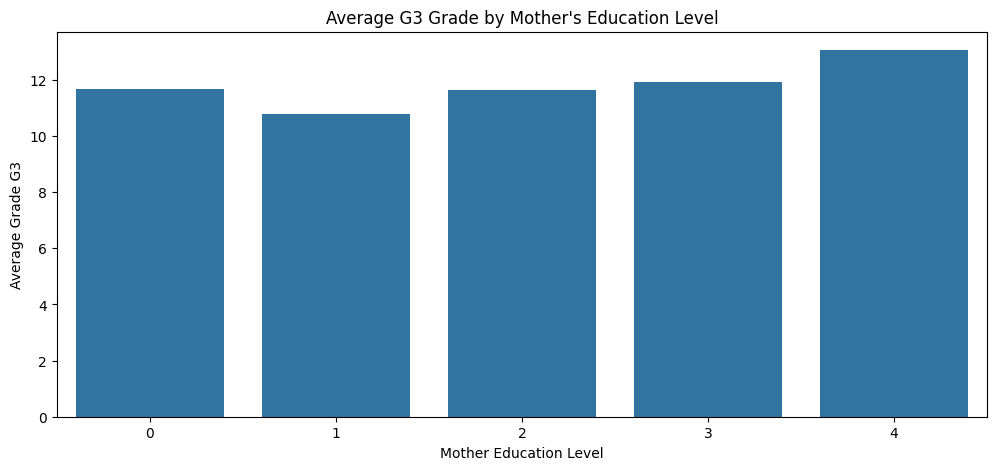

<ipython-input-151-a2f5f9a4f6f1>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Fedu', y='G3', ci=None)


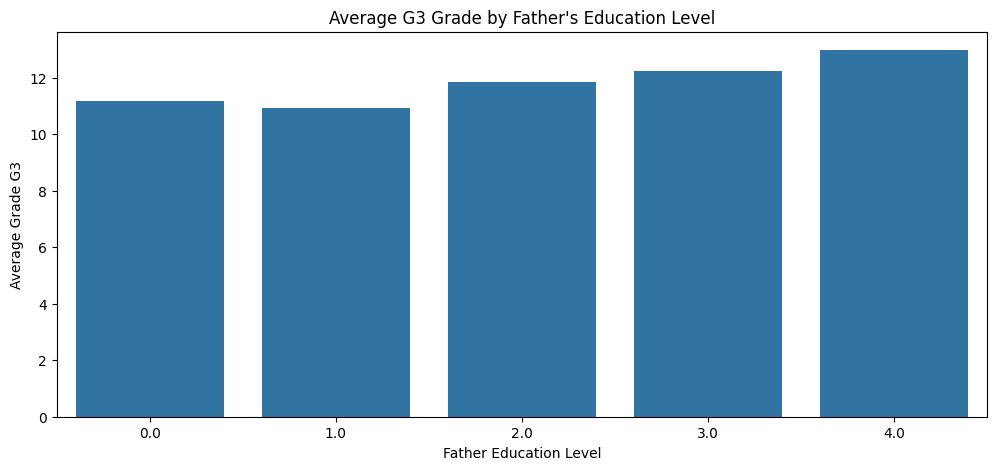

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Medu', y='G3', ci=None)
plt.title("Average G3 Grade by Mother's Education Level")
plt.xlabel('Mother Education Level')
plt.ylabel('Average Grade G3')
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Fedu', y='G3', ci=None)
plt.title("Average G3 Grade by Father's Education Level")
plt.xlabel('Father Education Level')
plt.ylabel('Average Grade G3')
plt.show()


In the bar graph also it is clearly visible that with increase in both mother's and father's education there is an increase in Grades of students. So Parent's education affects students grades in a positive way.

2. HOW DOES GENDER PLAYS A ROLE IN STUDENTS GRADE. DO FEMALES TEND TO STUDY BETTER THAN MALES OR VICE VERSA.

To compare the grades of males and females i will calculate the average grades of all the students.

In [ ]:
dp_avg_grades = df.groupby('sex')[['G1', 'G2', 'G3']].mean()
print("Average grades by gender:")
print(dp_avg_grades)

Average grades by gender:
            G1         G2         G3
sex                                 
F    11.637076  11.822454  12.253264
M    11.056391  11.203008  11.406015


We can see that Females have a slightly higher avg grade than Males. But this is a very localized dataset and we cannot comment much in general.

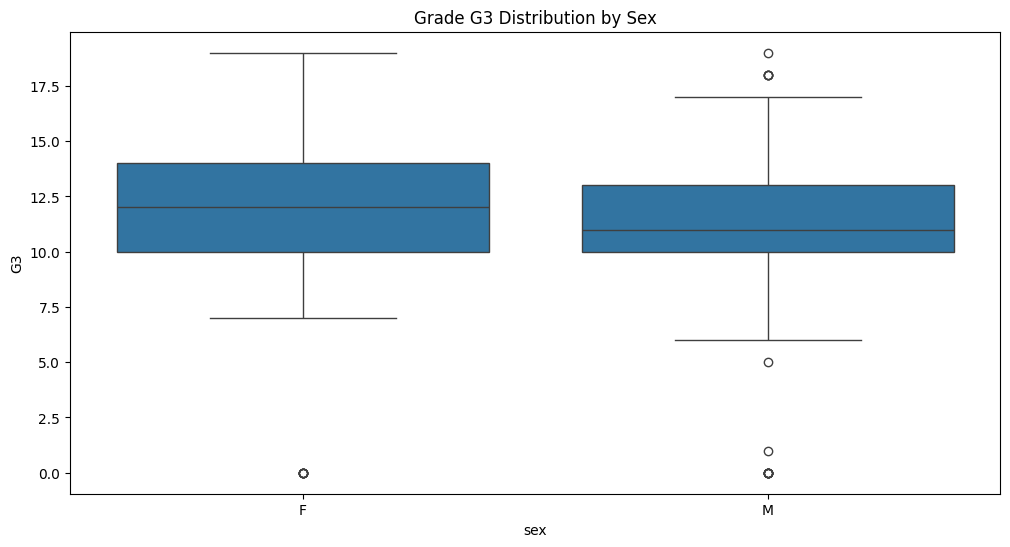

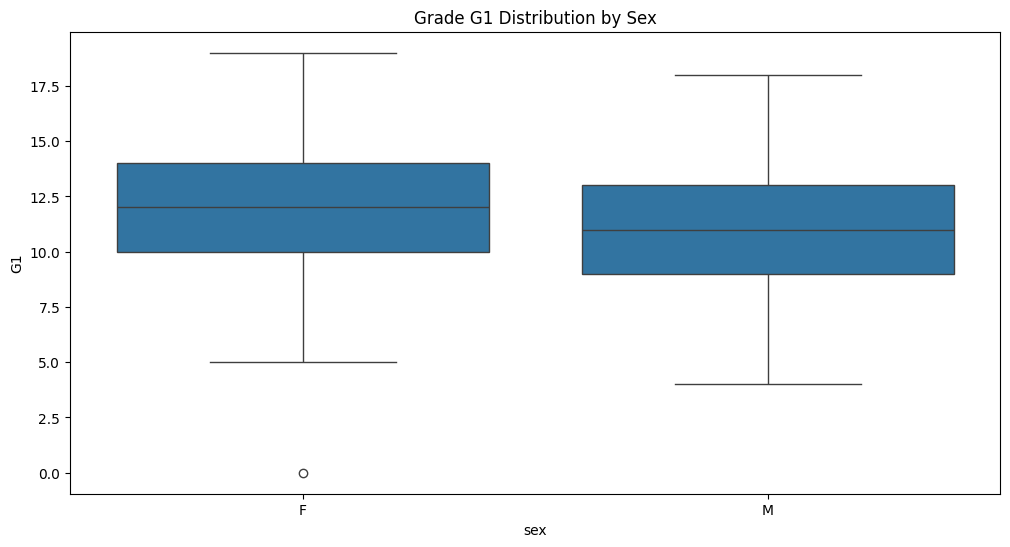

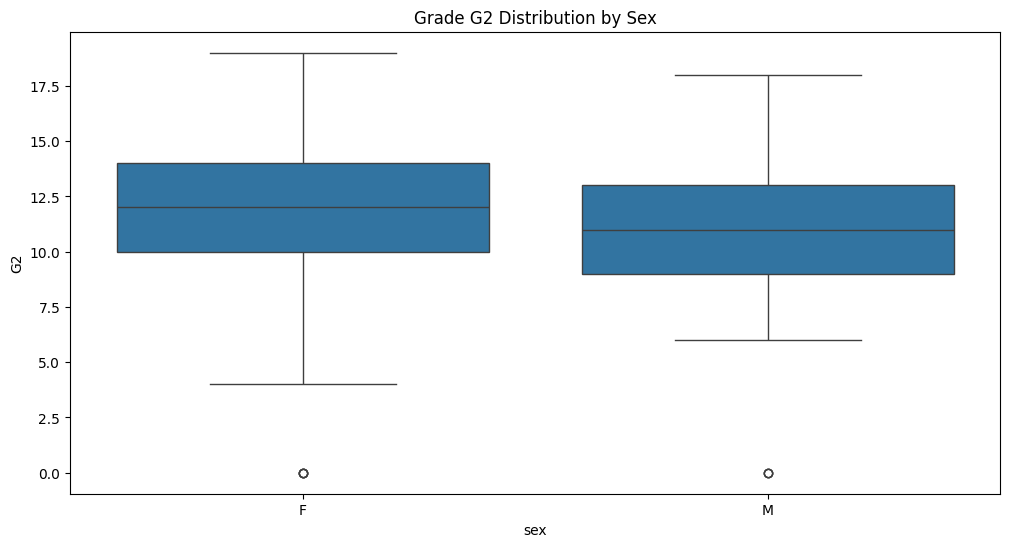

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='sex', y='G3', data=df)
plt.title("Grade G3 Distribution by Sex")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='sex', y='G1', data=df)
plt.title("Grade G1 Distribution by Sex")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='sex', y='G2', data=df)
plt.title("Grade G2 Distribution by Sex")
plt.show()


3. HOW DOES IT AFFECTS THE STUDENTS WHOSE
   PARENTS ARE APART.

I will compare activities,Dalc,health,absences and romantic relationship for students whose parents are apart and together.

In [ ]:
df_new = df.groupby('Pstatus')[['famrel','Dalc','health','absences','freetime','goout']].mean()
print(df_new)

           famrel      Dalc    health  absences  freetime     goout
Pstatus                                                            
A        3.800000  1.400000  3.487500  4.775000  3.087500  3.087500
T        3.949033  1.516696  3.543058  3.390158  3.170475  3.198594


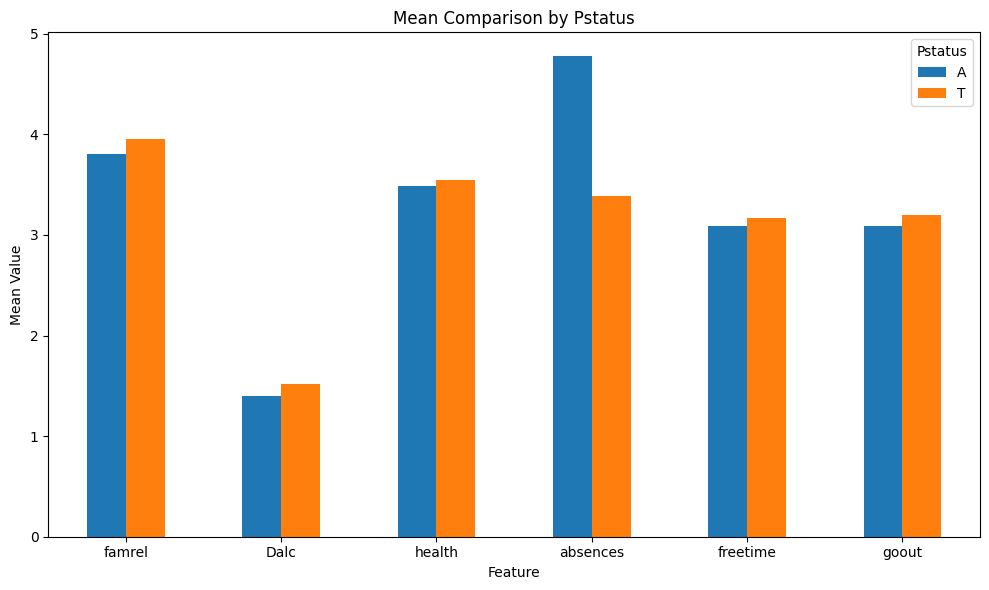

In [ ]:
df_new.T.plot(kind='bar', figsize=(10,6))
plt.title("Mean Comparison by Pstatus")
plt.ylabel("Mean Value")
plt.xlabel("Feature")
plt.xticks(rotation=0)
plt.legend(title="Pstatus")
plt.tight_layout()
plt.show()


From the above we can conclude that students whose parents are apart have very high absences. There is very little difference in famrel, Dalc, health, freetime and goout. But still students whose parents are apart have little bit less freetime and less goout than whose parents are together. Students with apart parents also have lower average family relations.


In [ ]:
df_new = df.groupby('Pstatus')[['romantic','activities','higher','internet','paid','nursery']]\
           .apply(lambda x: x.apply(pd.Series.value_counts))\
           .fillna(0).astype(int)

print(df_new)



             romantic  activities  higher  internet  paid  nursery
Pstatus                                                           
A       no         45          52       8        24    76       13
        yes        35          28      72        56     4       67
T       no        365         282      56       127   534      115
        yes       204         287     513       442    35      454


Here we can conclude that students whose Pstatus is T, tend to have higher percentage of students interested in activities, higher education as well as availability of internet.
Also 43% of students whose parents are apart have romantic relationship where as only 35% of studens whose parents are together have romantic relationship, this indicates that whose parents are apart probably have a feeling of loneliness and that is more interested in romantic relationship.
This helps in concluding that students whose parents are apart generally become lonely and there is a negative impact on them.

4. WHAT KIND OF DIFFERENCES IN EDUCATION FACILITIES DO STUDENTS IN RURAL AND URBAN AREAS GET.

In [ ]:

df_counts = df.groupby('address')[['romantic','activities','higher','internet','paid','nursery','schoolsup','famsup']]\
              .apply(lambda x: x.apply(pd.Series.value_counts))\
              .fillna(0)


df_percent = df_counts.groupby(level=0).apply(lambda x: x.div(x.sum(axis=0), axis=1)) * 100

df_percent = df_percent.round(2)

print(df_percent)


                     romantic  activities  higher  internet   paid  nursery  \
address address                                                               
R       R       no      60.91       50.76   13.71     34.52  92.89    20.81   
                yes     39.09       49.24   86.29     65.48   7.11    79.19   
U       U       no      64.16       51.77    8.19     18.36  94.47    19.25   
                yes     35.84       48.23   91.81     81.64   5.53    80.75   

                     schoolsup  famsup  
address address                         
R       R       no       90.36   39.09  
                yes       9.64   60.91  
U       U       no       89.16   38.50  
                yes      10.84   61.50  


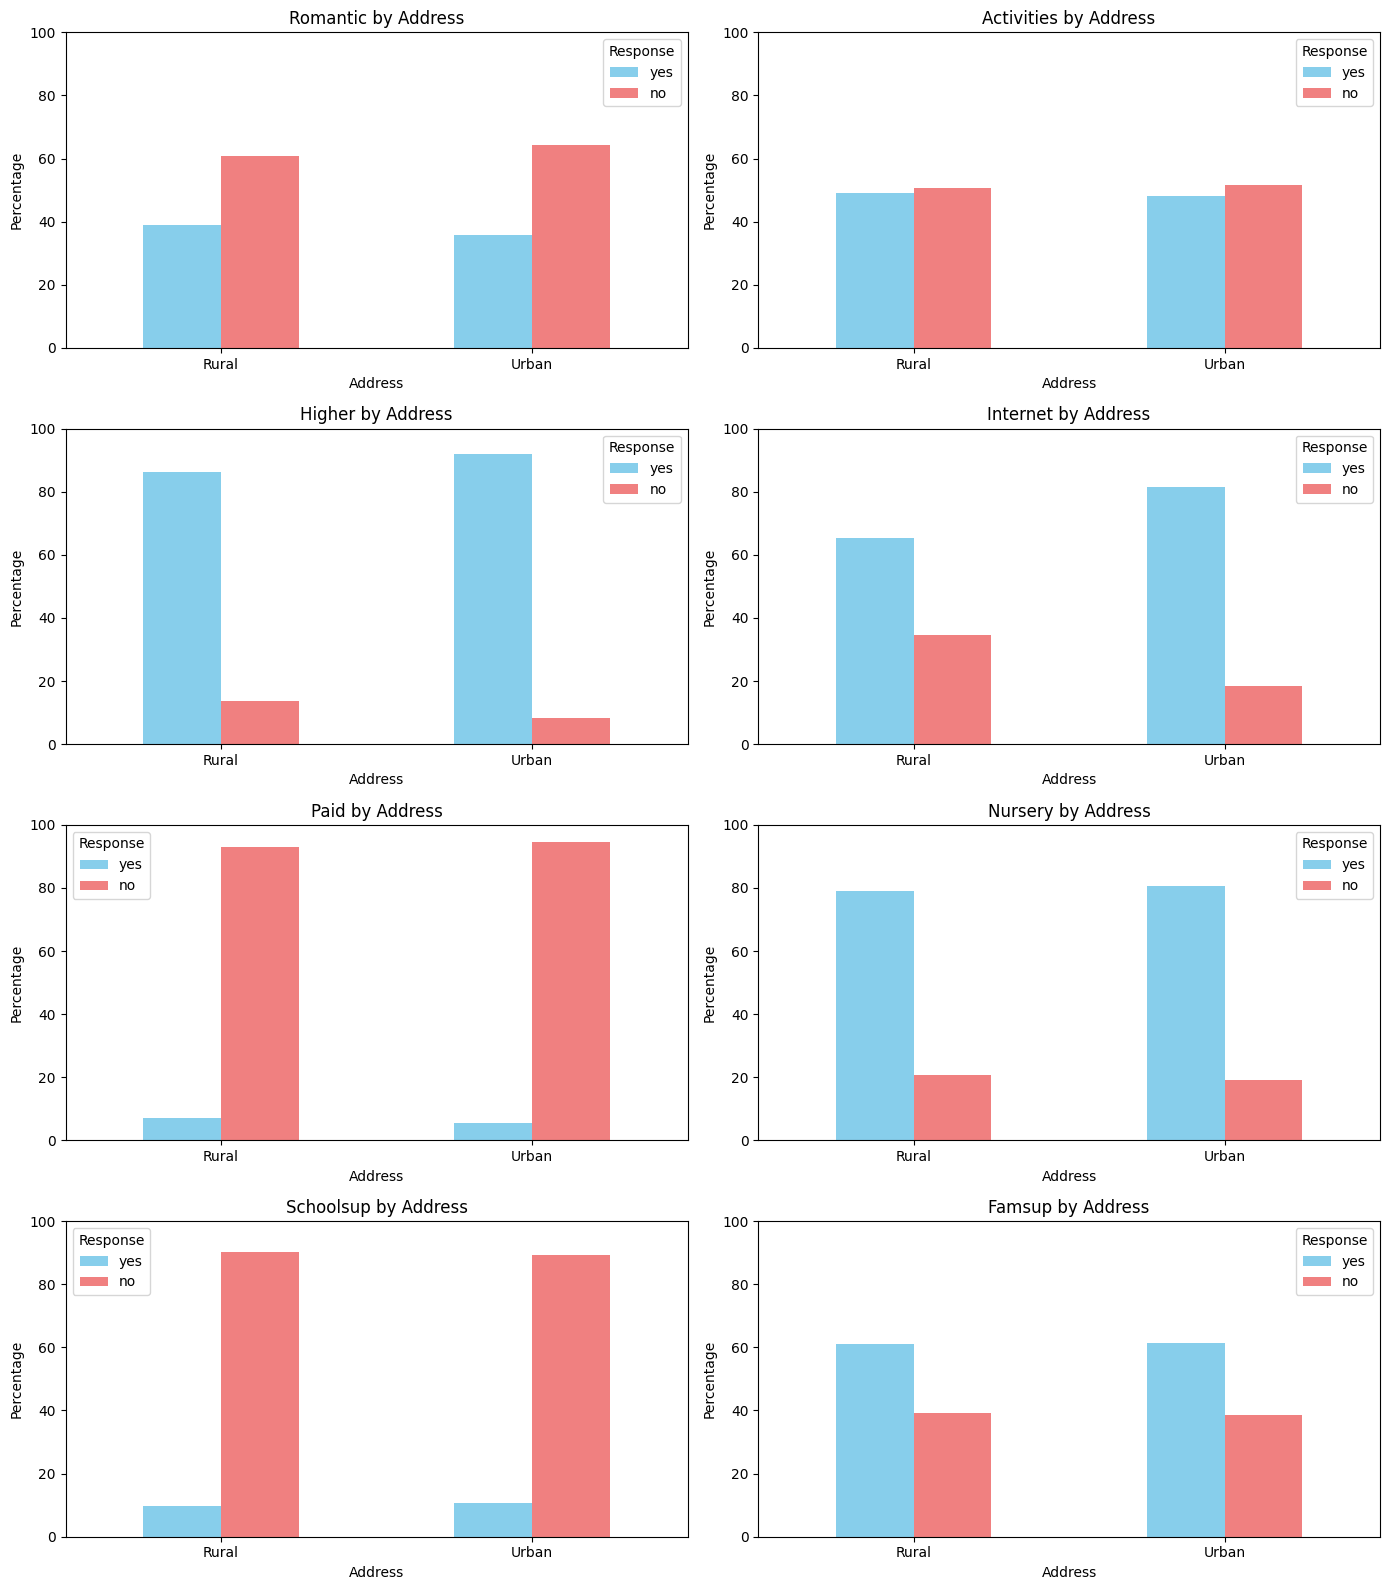

In [ ]:
import matplotlib.pyplot as plt

cols = ['romantic', 'activities', 'higher', 'internet', 'paid', 'nursery', 'schoolsup', 'famsup']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = df.groupby('address')[col].value_counts(normalize=True).unstack().fillna(0) * 100

    data[['yes', 'no']].plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral'])

    axes[i].set_title(f'{col.capitalize()} by Address')
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel('Address')
    axes[i].legend(title='Response')
    axes[i].set_ylim(0, 100)
    axes[i].set_xticklabels(['Rural', 'Urban'], rotation=0)

plt.tight_layout()
plt.show()


Here we can conclude that Rural and Urban areas get almost the same facilities in terms of Education like famsup,schoolsup,nursery,paid extra classes and higher education aspiration and activities.

The only but a very a crucial thing that Rural are students are behind urban students is internet. Above 80% of urban students have internet access whereas only 65% of rural students have internet access.

5. FIND OUT TWO FACTORS WHICH HIGHLY INCREASES THE CHANCES OF BEING IN RELATIONSHIP.

To answer this question we need to first shortlist such suspected factors. For example Feature_1(age),Dalc,absences,G1,G2,G3,goout.

                  romantic_encoded  Feature_1     goout    health  absences  \
romantic_encoded          1.000000   0.177722 -0.000520 -0.018025  0.090071   
Feature_1                 0.177722   1.000000  0.092685 -0.007604  0.109621   
goout                    -0.000520   0.092685  1.000000 -0.015741  0.061953   
health                   -0.018025  -0.007604 -0.015741  1.000000 -0.050480   
absences                  0.090071   0.109621  0.061953 -0.050480  1.000000   
Dalc                      0.062042   0.164249  0.245126  0.059067  0.149290   
G1                       -0.074973  -0.173833 -0.074053 -0.051647 -0.142246   
G2                       -0.098166  -0.105443 -0.082599 -0.083784 -0.120959   
G3                       -0.090583  -0.102429 -0.087641 -0.098851 -0.086584   

                      Dalc        G1        G2        G3  
romantic_encoded  0.062042 -0.074973 -0.098166 -0.090583  
Feature_1         0.164249 -0.173833 -0.105443 -0.102429  
goout             0.245126 -0.07

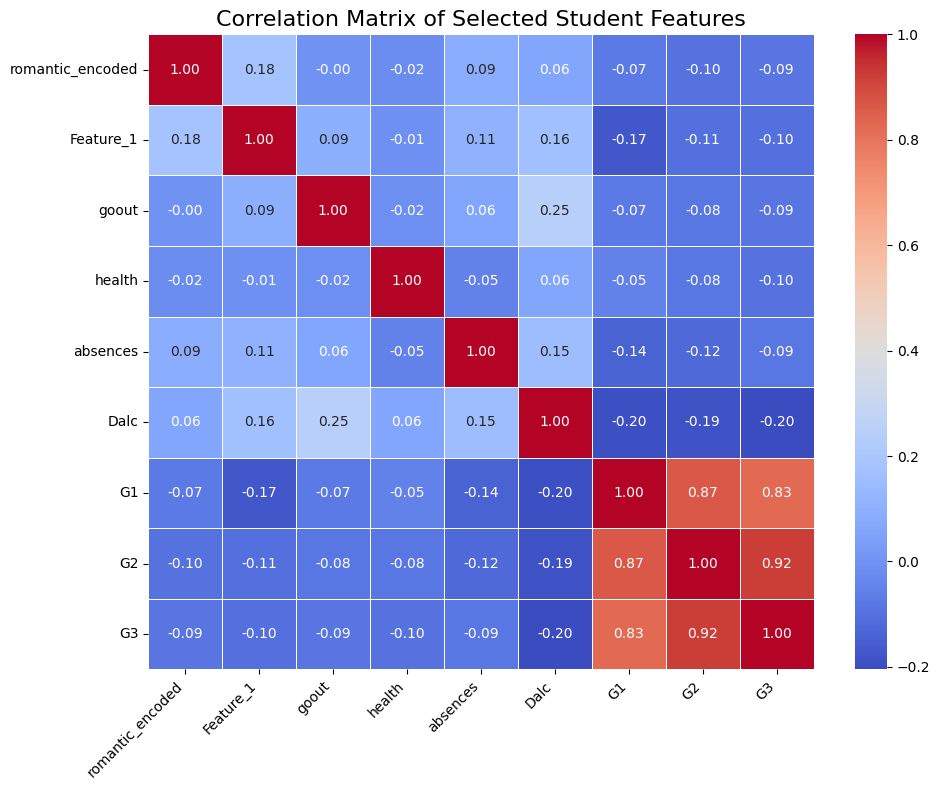

In [ ]:
dfNew = df.copy()
dfNew['romantic_encoded'] = dfNew['romantic'].map({'yes': 1, 'no': 0})
columns_for_subset = [
    'romantic_encoded', 'Feature_1', 'goout', 'health', 'absences',
    'Dalc', 'G1', 'G2', 'G3'
]
df_subset = dfNew[columns_for_subset]

corr_matrix = df_subset.corr()
print(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation Matrix of Selected Student Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

From the above matrix we can see that Feature_1 and absences are highly related to romantic as compared to other features and G3 and G2 are highly negatively related.

                                   MODEL TRAINING FOR ROMANTIC RELATIONSHIP PREDICTION

🔼 Top 10 positively correlated features with being in a romantic relationship:

Feature_1         0.177722
guardian_other    0.130019
absences          0.090071
school_MS         0.072241
failures          0.069901
Dalc              0.062042
activities_yes    0.057517
Feature_2         0.048487
Mjob_other        0.039095
reason_other      0.035453
Name: romantic, dtype: float64

🔽 Top 10 negatively correlated features:

Pstatus_T           -0.053828
Fedu                -0.059372
Mjob_services       -0.063447
reason_reputation   -0.066754
G1                  -0.074973
G3                  -0.090583
schoolsup_yes       -0.094310
G2                  -0.098166
higher_yes          -0.101056
sex_M               -0.110144
Name: romantic, dtype: float64


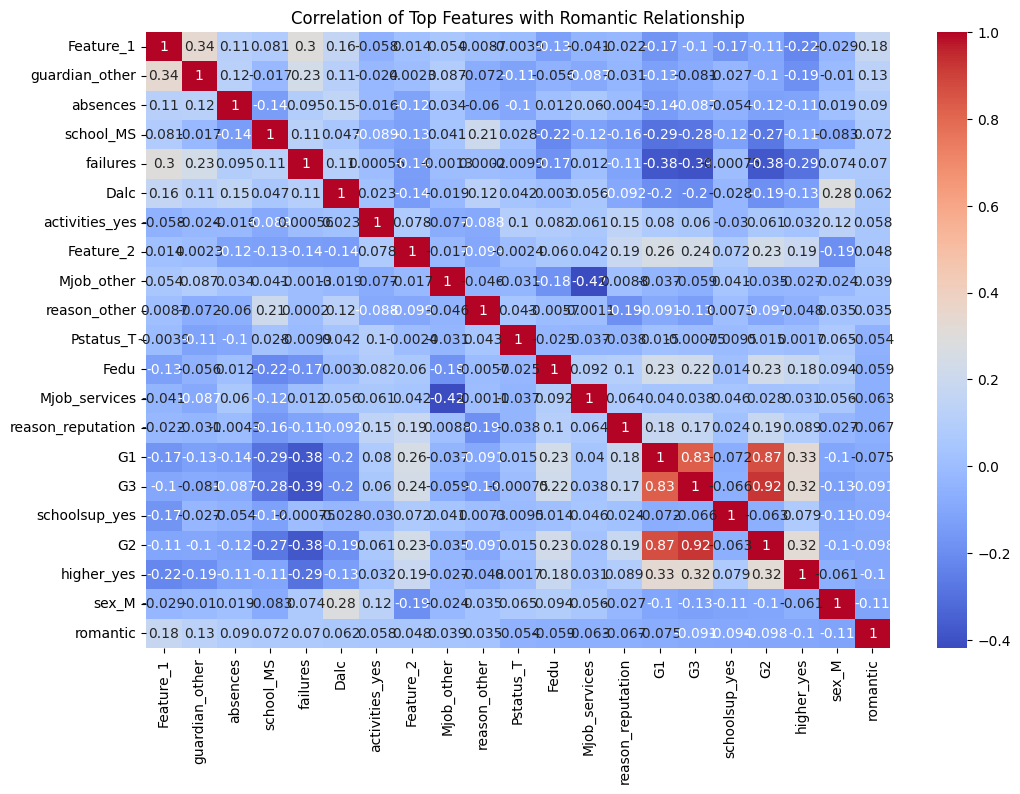

Best parameters: {}
Best cross-validation accuracy: 0.6030246452576551

📊 Test Accuracy: 0.676923076923077

📉 Confusion Matrix:
 [[74  8]
 [34 14]]

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.90      0.78        82
           1       0.64      0.29      0.40        48

    accuracy                           0.68       130
   macro avg       0.66      0.60      0.59       130
weighted avg       0.67      0.68      0.64       130


ℹ️ Feature importance is not directly available for Gaussian Naive Bayes.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Encode target column 'romantic'
if df['romantic'].dtype == 'object':
    df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})

# Step 2: One-hot encode other categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# ✅ Step 2.5: Standard scale numeric columns before correlation
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.drop('romantic')
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Step 3: Correlation analysis
correlation_matrix = df_encoded.corr()
correlation_with_target = correlation_matrix['romantic'].sort_values(ascending=False)

threshold = 0.06
relevant_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()
if 'romantic' in relevant_features:
    relevant_features.remove('romantic')

df_reduced = df_encoded[relevant_features + ['romantic']]

top_positive = correlation_with_target[1:11]
top_negative = correlation_with_target[-10:]

print("🔼 Top 10 positively correlated features with being in a romantic relationship:\n")
print(top_positive)
print("\n🔽 Top 10 negatively correlated features:\n")
print(top_negative)

top_features = list(top_positive.index) + list(top_negative.index)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded[top_features + ['romantic']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Top Features with Romantic Relationship")
plt.show()

# Step 5: Prepare features and target
X = df_reduced.drop('romantic', axis=1)
y = df_reduced['romantic']

# Step 6: Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['float64']).columns  # already scaled
categorical_cols = X.select_dtypes(include=['uint8']).columns

# Step 7: Define preprocessor (skip scaler here because already done)
numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ],
    remainder='passthrough'
)

# Step 8: Define pipeline with GaussianNB
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('nb', GaussianNB())
])

# Step 9: Train/test split with stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 10: Train using GridSearchCV (no hyperparameters to tune for GaussianNB)
grid = GridSearchCV(pipeline, param_grid={}, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

# Step 11: Evaluate on test data
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\n📊 Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📑 Classification Report:\n", classification_report(y_test, y_pred))

# Step 12: Naive Bayes does not provide feature importances directly
print("\nℹ️ Feature importance is not directly available for Gaussian Naive Bayes.")


Created combined features for correlated groups:
G3_G2_combined: combined from ['G3', 'G2']

🔼 Top 10 positively correlated features with being in a romantic relationship:

Feature_1         0.177722
guardian_other    0.130019
absences          0.090071
schoolsup_yes    -0.094310
G3_G2_combined   -0.096045
higher_yes       -0.101056
sex_M            -0.110144
Name: romantic, dtype: float64

🔽 Top 10 negatively correlated features:

romantic          1.000000
Feature_1         0.177722
guardian_other    0.130019
absences          0.090071
schoolsup_yes    -0.094310
G3_G2_combined   -0.096045
higher_yes       -0.101056
sex_M            -0.110144
Name: romantic, dtype: float64


<ipython-input-161-d9685a774507>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[combined_name] = df_reduced[correlated].mean(axis=1)


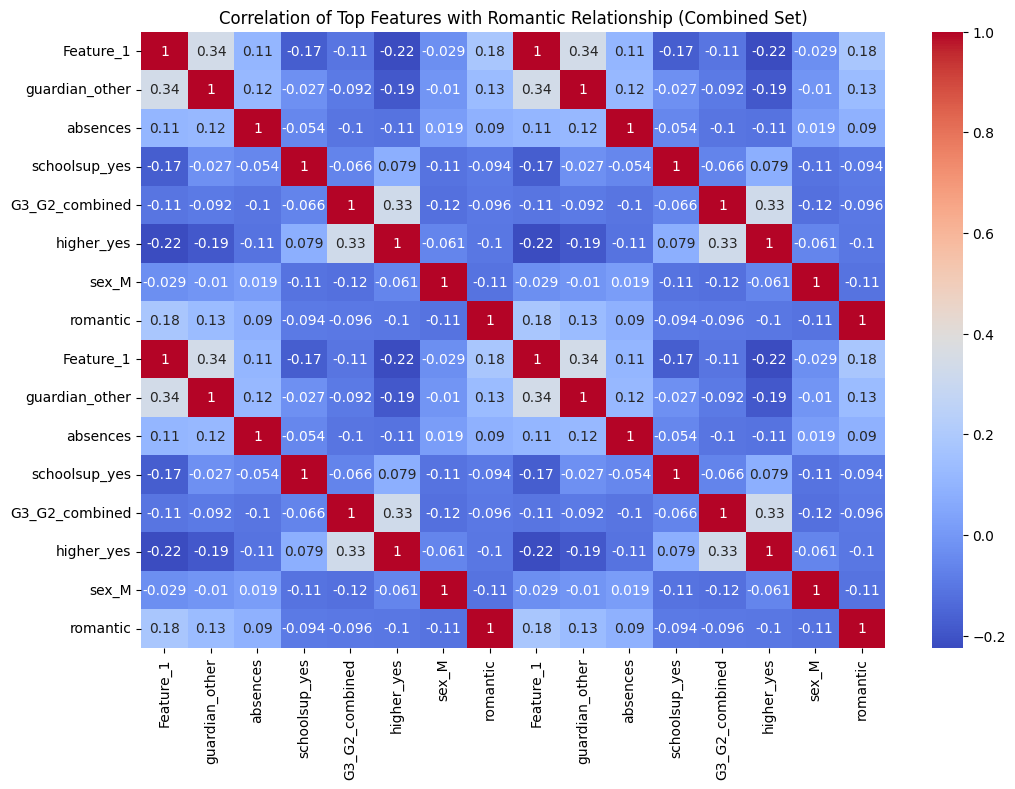

Best parameters: {}
Best cross-validation accuracy: 0.6241598207617625

📊 Test Accuracy: 0.7

📉 Confusion Matrix:
 [[73  9]
 [30 18]]

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79        82
           1       0.67      0.38      0.48        48

    accuracy                           0.70       130
   macro avg       0.69      0.63      0.63       130
weighted avg       0.69      0.70      0.68       130


ℹ️ Feature importance is not directly available for Gaussian Naive Bayes.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Encode target column 'romantic'
if df['romantic'].dtype == 'object':
    df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})

# Step 2: One-hot encode other categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 3: Correlation analysis with target
correlation_matrix = df_encoded.corr()
correlation_with_target = correlation_matrix['romantic'].sort_values(ascending=False)

threshold = 0.08
relevant_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()
if 'romantic' in relevant_features:
    relevant_features.remove('romantic')

# Create reduced df with relevant features
df_reduced = df_encoded[relevant_features + ['romantic']]

# Step 3a: Combine correlated features (>0.3 correlation)
feature_corr = df_reduced.drop('romantic', axis=1).corr().abs()

# To keep track of combined groups
visited = set()
combined_features = {}

for col in feature_corr.columns:
    if col not in visited:
        # Find features correlated with col > 0.3 (including itself)
        correlated = feature_corr.index[(feature_corr[col] > 0.4)].tolist()
        correlated = [f for f in correlated if f not in visited]

        if len(correlated) > 1:
            # Combine these features by average
            combined_name = "_".join(correlated) + "_combined"
            df_reduced[combined_name] = df_reduced[correlated].mean(axis=1)

            # Mark them visited
            for f in correlated:
                visited.add(f)

            # Save combined feature name
            combined_features[combined_name] = correlated
        else:
            visited.add(col)

# Drop all original combined features (those in combined_features.values())
to_drop = [f for sublist in combined_features.values() for f in sublist]
df_reduced = df_reduced.drop(columns=to_drop)

print("Created combined features for correlated groups:")
for combined, originals in combined_features.items():
    print(f"{combined}: combined from {originals}")

# Step 4: Re-check correlation with target
correlation_with_target = df_reduced.corr()['romantic'].sort_values(ascending=False)
top_positive = correlation_with_target[1:11]
top_negative = correlation_with_target[-10:]

print("\n🔼 Top 10 positively correlated features with being in a romantic relationship:\n")
print(top_positive)
print("\n🔽 Top 10 negatively correlated features:\n")
print(top_negative)

top_features = list(top_positive.index) + list(top_negative.index)
plt.figure(figsize=(12, 8))
sns.heatmap(df_reduced[top_features + ['romantic']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Top Features with Romantic Relationship (Combined Set)")
plt.show()

# Step 5: Prepare features and target
X = df_reduced.drop('romantic', axis=1)
y = df_reduced['romantic']

# Step 6: Identify numeric columns for scaling & polynomial features
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['uint8']).columns  # already one-hot encoded

# Step 7: Define preprocessor with polynomial features + scaling on numeric columns
numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ],
    remainder='passthrough'  # Leave one-hot encoded columns as-is
)

# Step 8: Define pipeline with GaussianNB
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('nb', GaussianNB())
])

# Step 9: Train/test split with stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 10: Train using GridSearchCV (no hyperparameters to tune for GaussianNB)
grid = GridSearchCV(pipeline, param_grid={}, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

# Step 11: Evaluate on test data
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\n📊 Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📑 Classification Report:\n", classification_report(y_test, y_pred))

print("\nℹ️ Feature importance is not directly available for Gaussian Naive Bayes.")



Training and tuning Logistic Regression...
Best parameters for Logistic Regression: {'model__C': 0.01, 'model__solver': 'liblinear'}
Test accuracy for Logistic Regression: 0.6231
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      0.61      0.67        82
           1       0.49      0.65      0.56        48

    accuracy                           0.62       130
   macro avg       0.62      0.63      0.61       130
weighted avg       0.65      0.62      0.63       130



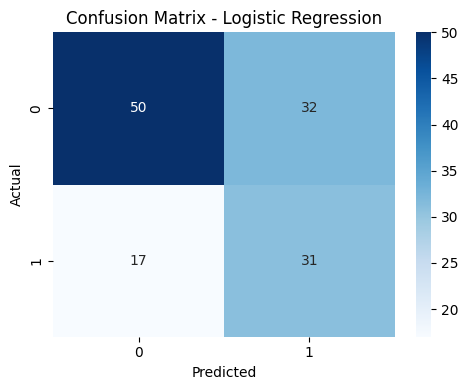


Training and tuning Random Forest...
Best parameters for Random Forest: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 50}
Test accuracy for Random Forest: 0.6154
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72        82
           1       0.47      0.33      0.39        48

    accuracy                           0.62       130
   macro avg       0.57      0.56      0.55       130
weighted avg       0.59      0.62      0.60       130



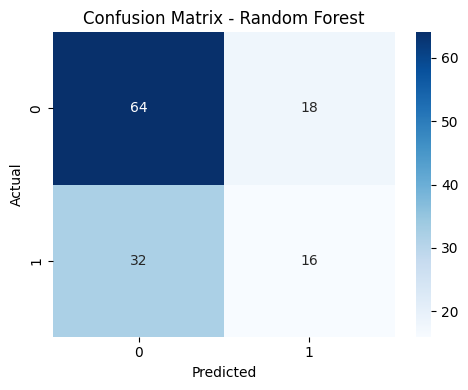


Best model is Logistic Regression with accuracy 0.6231


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models and hyperparameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42,class_weight="balanced"),
        'params': {
            'model__C': [0.01, 0.1, 1, 10],
            'model__solver': ['liblinear', 'lbfgs']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'model__n_estimators': [50, 100],
            'model__max_depth': [None, 10, 20],
            'model__min_samples_split': [2, 5]
        }
    }

}

# Store results
results = {}

for name, mp in models.items():
    print(f"\nTraining and tuning {name}...")

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', mp['model'])
    ])

    gs = GridSearchCV(pipe, mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    gs.fit(X_train, y_train)

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Best parameters for {name}: {gs.best_params_}")
    print(f"Test accuracy for {name}: {acc:.4f}")
    print(f"Classification report for {name}:\n{classification_report(y_test, y_pred)}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    results[name] = {'best_model': best_model, 'accuracy': acc}

# Best model overall
best_algo = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest model is {best_algo} with accuracy {results[best_algo]['accuracy']:.4f}")


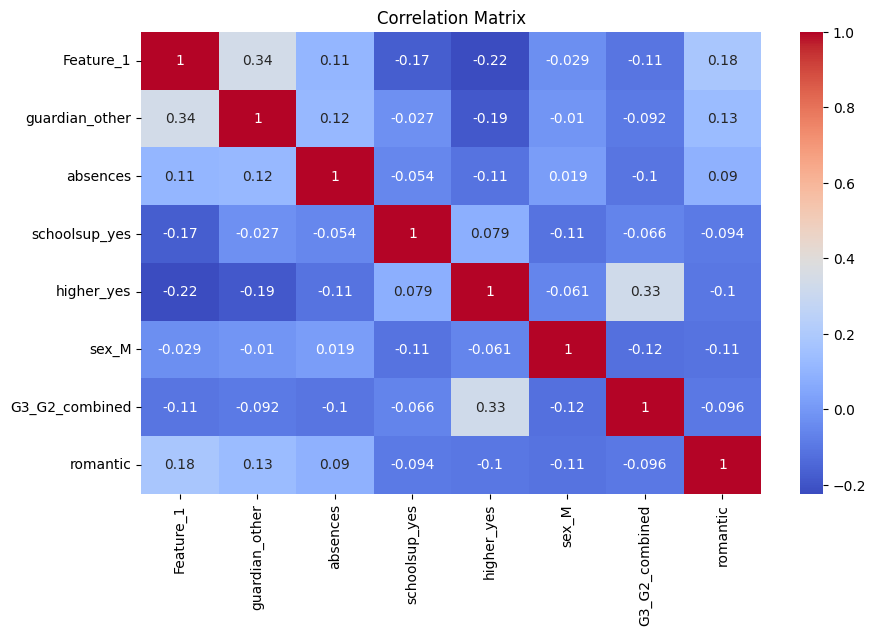

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y is already numeric (0/1)
df_copy = X.copy()
df_copy['romantic'] = y
plt.figure(figsize=(10, 6))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
print(X.columns.tolist())

['Feature_1', 'guardian_other', 'absences', 'schoolsup_yes', 'higher_yes', 'sex_M', 'G3_G2_combined']


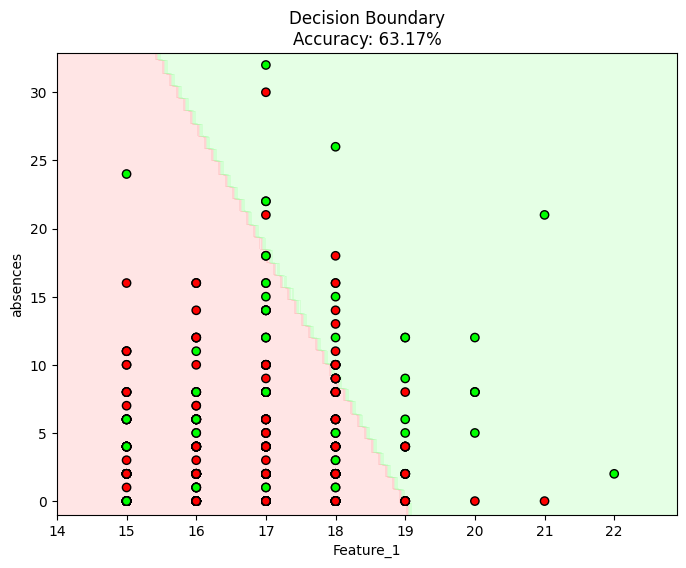

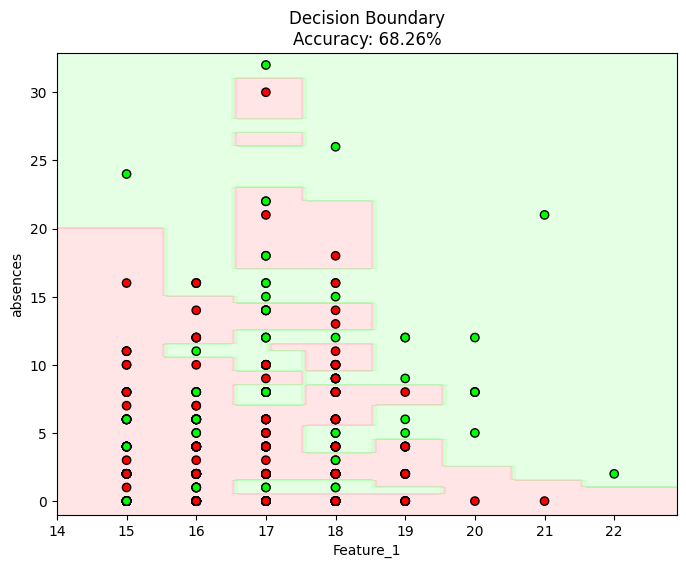

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

def plot_decision_boundary(model, X, y, features):
    X_selected = X[features].values


    model.fit(X_selected, y)

    y_pred = model.predict(X_selected)
    accuracy = accuracy_score(y, y_pred)


    x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
    y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)


    plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y, cmap=cmap_bold, edgecolor='k')

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(f"Decision Boundary\nAccuracy: {accuracy * 100:.2f}%")
    plt.show()

from sklearn.linear_model import LogisticRegression

features = ['Feature_1', 'absences']
plot_decision_boundary(LogisticRegression(), X, y, features)
plot_decision_boundary(RandomForestClassifier(), X, y, features)
#First plot is of Logistic Regression and the second one is for RandomForest Classifier.


In [ ]:
!pip install shap

LogisticRegression


/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


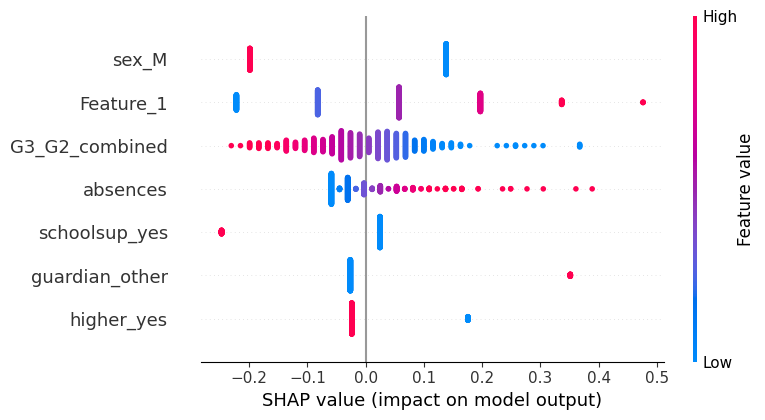

In [ ]:
import shap

# Use the best model pipeline from GridSearchCV
best_model = results[best_algo]['best_model']

# Extract the scaler and the classifier
scaler = best_model.named_steps['scaler']
classifier = best_model.named_steps['model']

# Transform the training data using the scaler in the pipeline
X_train_scaled = scaler.transform(X_train)  # X_train must have the same columns as used in training

# Convert scaled data back to DataFrame for SHAP, columns are same as original X_train columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Create SHAP explainer on the scaled data
# For tree-based models like RandomForest:
if best_algo == 'Random Forest':
    print("RANDOM FOREST")
    explainer = shap.TreeExplainer(classifier)
else:
    # For LogisticRegression or other linear models, use KernelExplainer or LinearExplainer
    print("LogisticRegression")
    explainer = shap.LinearExplainer(classifier, X_train_scaled_df, feature_perturbation="interventional")



# Calculate SHAP values on a sample or the whole training set
shap_values = explainer.shap_values(X_train_scaled_df)

# Plot summary
shap.summary_plot(shap_values, X_train_scaled_df)


We can see that almost all the features are linearly related to romantic relationship status. This is because we see a clearly increasing gradient of the feature as its SHAP value increases.
A positive SHAP value represents yes in romantic relationship and negative SHAP value just the opposite.
1. As the age(Feature_1) increases the chances of student being in romantic relationship increases.
2. Males have a high chance of not being in a relationship whereas Females have a high chance of being in romantic relationship.
3. Higher absences also indicates towards
increasing SHAP values that is more chance of being in relationship.
4. Students in romantic relationship also have degraded grades as we can see from the G1_G3_G2_combined feature.
5. Students whose guardian is not their parent but other has a very high shap value(we can see this from a red dot in the guardian_other row which has significantly high positive SHAP value) that is more chance of being in relationship.

Students who are of less age, more inclined towards academics, disciplined and have their parents as their guardian have more probability of being in relationship and the model also predicts on these factors(age,guardian_other,grades,absences).

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Student predicted to be in a relationship (Yes):


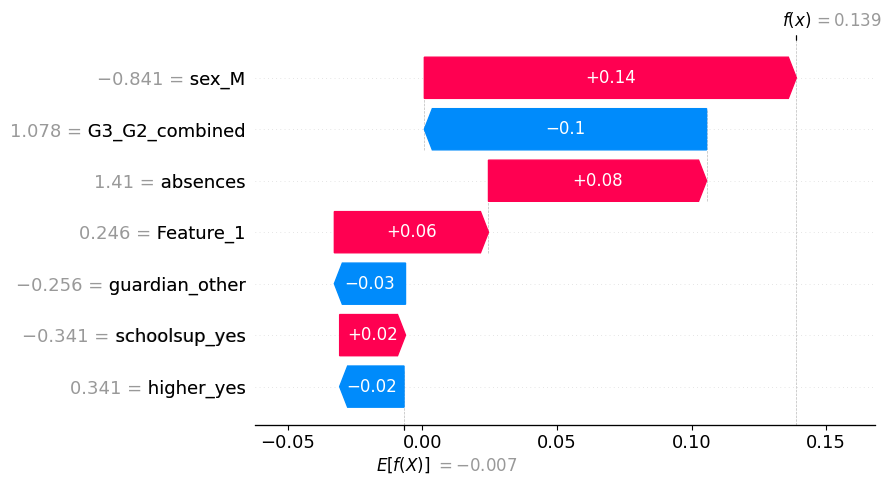

Student predicted NOT to be in a relationship (No):


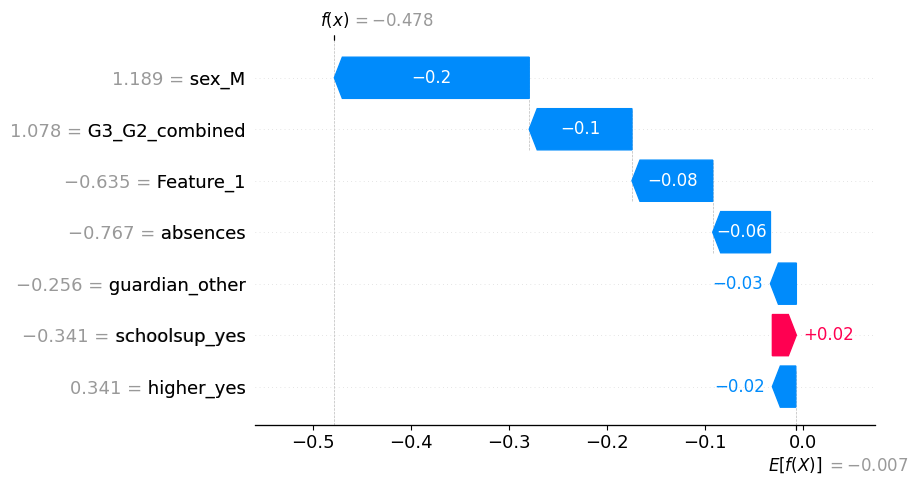

In [ ]:

X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


y_pred = classifier.predict(X_test_scaled_df)
y_test_reset = y_test.reset_index(drop=True)

shap_values_test = explainer(X_test_scaled_df)


yes_idx = y_test_reset[y_pred == 1].index[0]
no_idx = y_test_reset[y_pred == 0].index[0]


print("Student predicted to be in a relationship (Yes):")
shap.plots.waterfall(shap_values_test[yes_idx], max_display=10)


print("Student predicted NOT to be in a relationship (No):")
shap.plots.waterfall(shap_values_test[no_idx], max_display=10)


 FOR THE STUDENT PREDICTED BY THE MODEL TO BE YES.
Being female (indicated by the negative sex_M value), which contributed positively (+0.14).
Having a certain number of absences, which contributed positively (+0.08).
The Feature_1(age), which contributed positively (+0.06).
Higher combined grades (G3_G2_combined) had a notable negative impact (-0.1), making a "Yes" prediction less likely.
 FOR THE STUDENT PREDICTED BY THE MODEL TO BE NO.
The model predicted "No" (not in a relationship) for this student primarily because of the negative contributions from being male, higher combined grades, the value of Feature_1(age), and the level of absences. These factors outweighed the small positive contribution from receiving school support.

                                              BONUS LEVEL FOR TASK 1

PLOT 1: This plot shows numerous rectangles aligned with the axes, along with some patchy areas. It likely comes from a Random Forest model, which uses multiple trees.

PLOT 2: Here, the boundary separating the blue points is extremely detailed, suggesting significant overfitting. The use of many small rectangles indicates a Decision Tree.

PLOT 3: The smooth, but not perfectly elliptical, shape suggests a Support Vector Machine (SVM) with a non-linear kernel. SVMs are known for their flexibility and "soft" boundaries.

PLOT 4: The smooth, elliptical or oval boundary, without any rectangular regions, points to a Naive Bayes classifier. KNN would have some irregular regions.

PLOT 5: This plot features irregular shapes and non-aligned regions. The regions are formed based on nearby points, suggesting a K-Nearest Neighbors (KNN) model with a moderate value of k.